In [22]:
from google.colab import drive
import sys

In [23]:
sys.path.insert(0,'/content/drive/Othercomputers/My Computer/Homework/Lab/Cu-Al/CO2RR-Adsorbates-main/Supplementary Functions')


In [24]:
import helpers
import calculate
import nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# from paper
from helpers import feature_importance, pearson_correlation, transform_2D, seed_everything, scaler
from calculate import ml_predict, val_score, calc_average
from nn import create_model, train_model_mae, train_model_rmse, load_model
# Seed all parameters to ensure repeatability
seed_everything()

image_directory = '/content/output image'

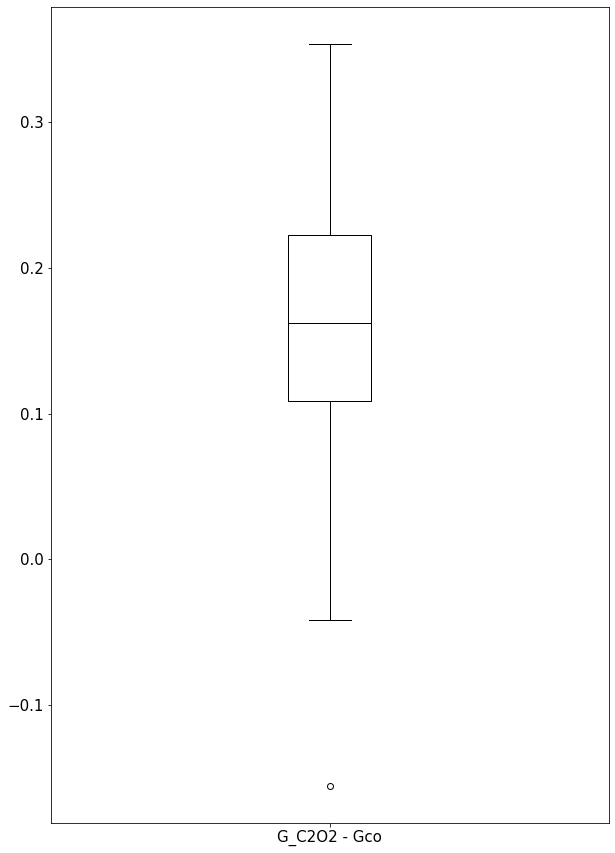

In [25]:
# Read in our data file
df = pd.read_csv("/content/drive/Othercomputers/My Computer/Homework/Lab/Cu-Al/CO2RR-Adsorbates-main/Data/CO Dimerization Training.csv")

# Drop adsorbates 1 and 2 from our feature space as they will not participate in training
final_df = df.drop(columns = ['Adsorbate 1', 'Adsorbate 2'])

# Boxplot of the target feature
final_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='G_C2O2 - Gco', grid=False, figsize=(10, 15));

# noise
np.random.seed(15)
mu, sigma = 0, 0.065
noise = np.random.normal(mu, sigma, [1,65]).tolist()
final_df['G_C2O2 - Gco'] = final_df['G_C2O2 - Gco'] + noise[0]

In [26]:
# machine learning
# feature selection/perfotmance test
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge

# Instantiate regressor algorithms
GBR = GradientBoostingRegressor(random_state=50)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=50)
SR = SVR()
KRR = KernelRidge()
xgbr = XGBRegressor(random_state=50)
light = LGBMRegressor(random_state=50)

regressors= [GBR, KNR, RFR, SR, KRR, xgbr, light]
reg_xgbr = [xgbr]

[08:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[08:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

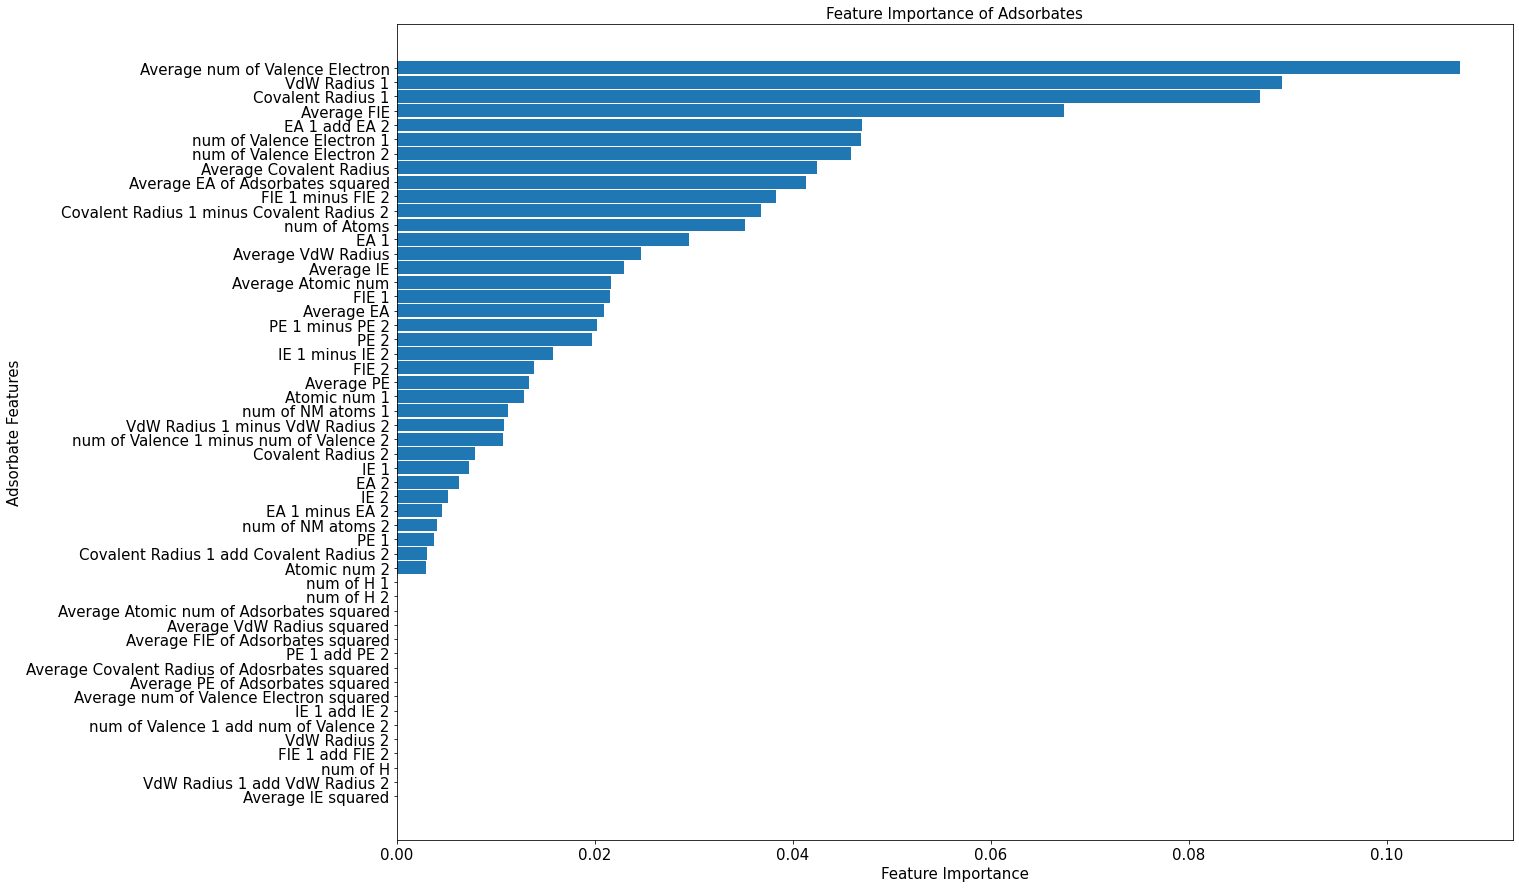

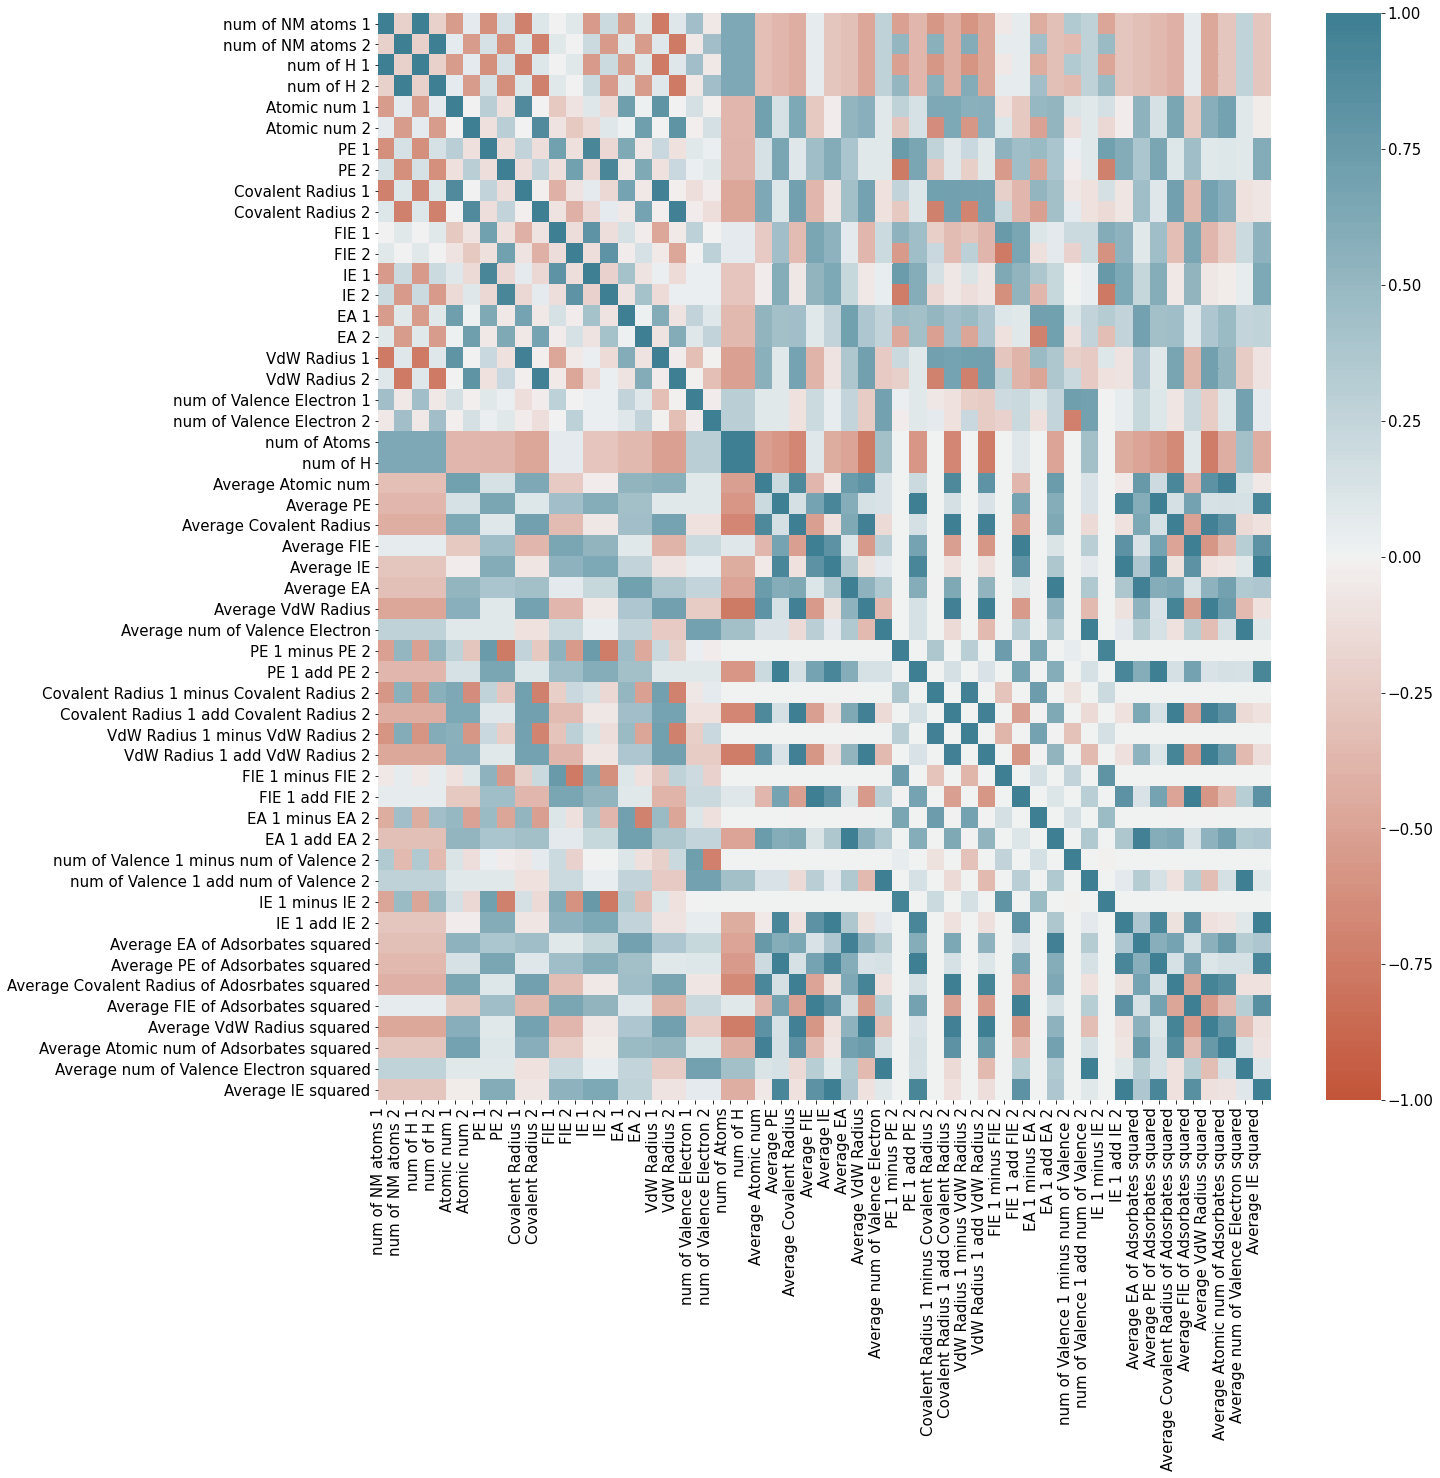

In [27]:
# Create an empty df to save the results of each regressor for each round of feature removal
# rd1
results_df = pd.DataFrame(columns = ['# Features', 'GBR', 'KNR', 'RFR', 'SVR', 'KRR', 'XGBR', 'LightGBM', 'Time'])

results_xgbr = pd.DataFrame(columns = ['# Features', 'XGBR', 'Time'])

val_score(final_df, 1, reg_xgbr, results_xgbr,10)

print(results_xgbr)
# Model performance evalution using CV
val_score(final_df, 1, regressors, results_df, 10)
# Check the results of model performance
results_df
# Print a ranking of initial feature importance
feature_importance(XGBRegressor(), final_df)
# Pearson's correlation heatmap of feature pairs
pearson_correlation(final_df, last=True)

[08:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[08:16:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:16:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:16:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:16:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:16:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:16:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:16:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:16:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

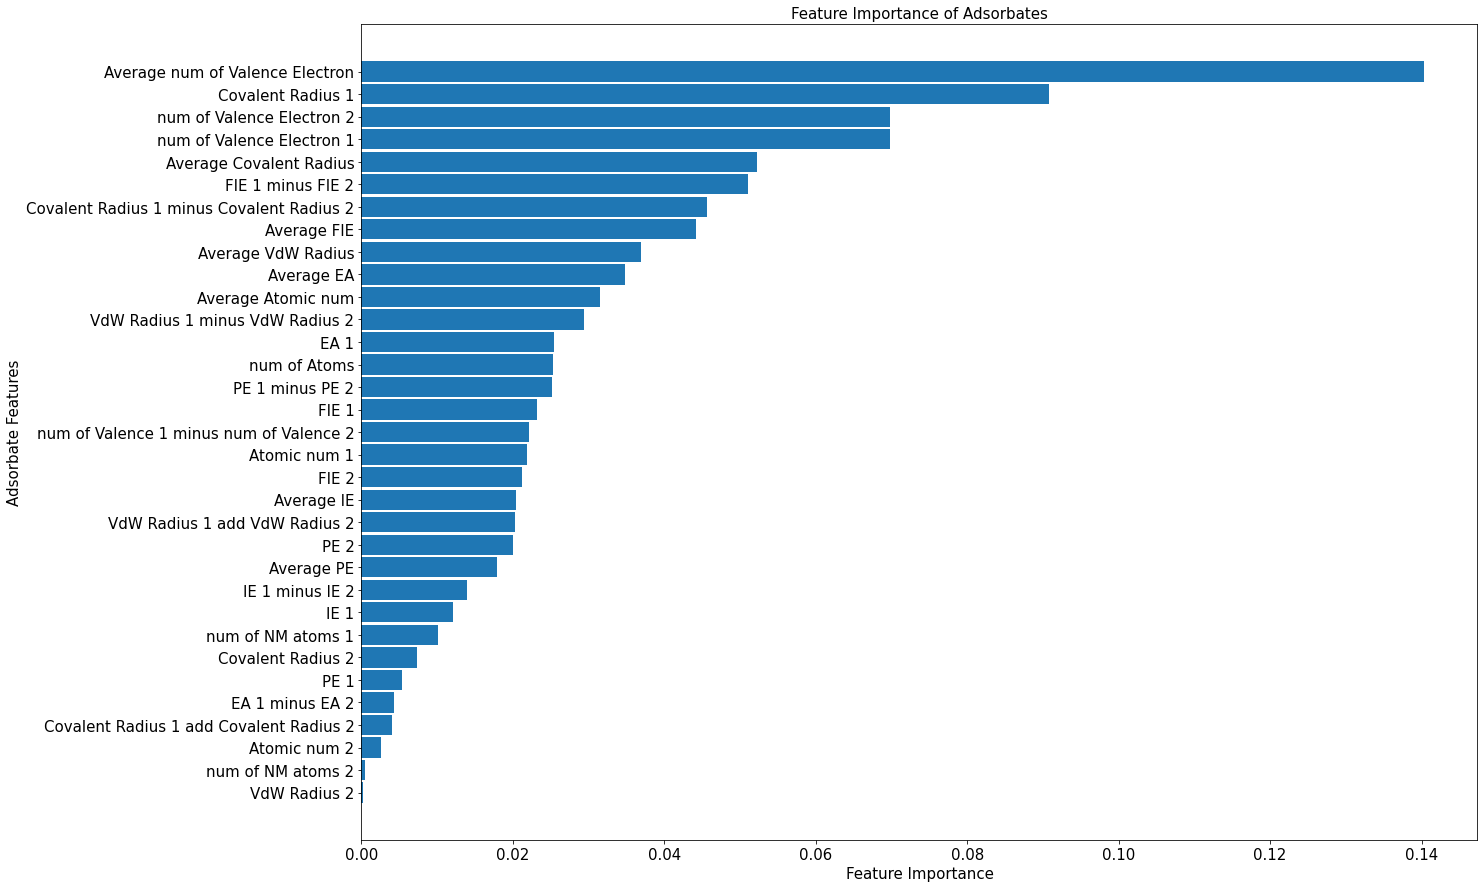

In [28]:
# rd2
df_2=final_df.copy()
# Dropping low ranking or dependent features
df_2 = df_2.drop(columns = ['IE 2',
       'num of H', 'Average PE of Adsorbates squared',
       'Average Atomic num of Adsorbates squared','num of H 1','num of H 2',
       'Average VdW Radius squared', 'Average FIE of Adsorbates squared','Average Covalent Radius of Adosrbates squared',
       'Average num of Valence Electron squared','IE 1 add IE 2','num of Valence 1 add num of Valence 2','EA 1 add EA 2','EA 2','VdW Radius 1','Average EA of Adsorbates squared','FIE 1 add FIE 2','PE 1 add PE 2', 'Average IE squared'])
val_score(df_2, 2, reg_xgbr, results_xgbr, 20)
print(results_xgbr)
# Model performance evalution using CV
val_score(df_2,2, regressors, results_df, 20)
# Check the results of model performance
print(results_df)
# Print a ranking of initial feature importance
feature_importance(XGBRegressor(), df_2)


[08:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[08:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

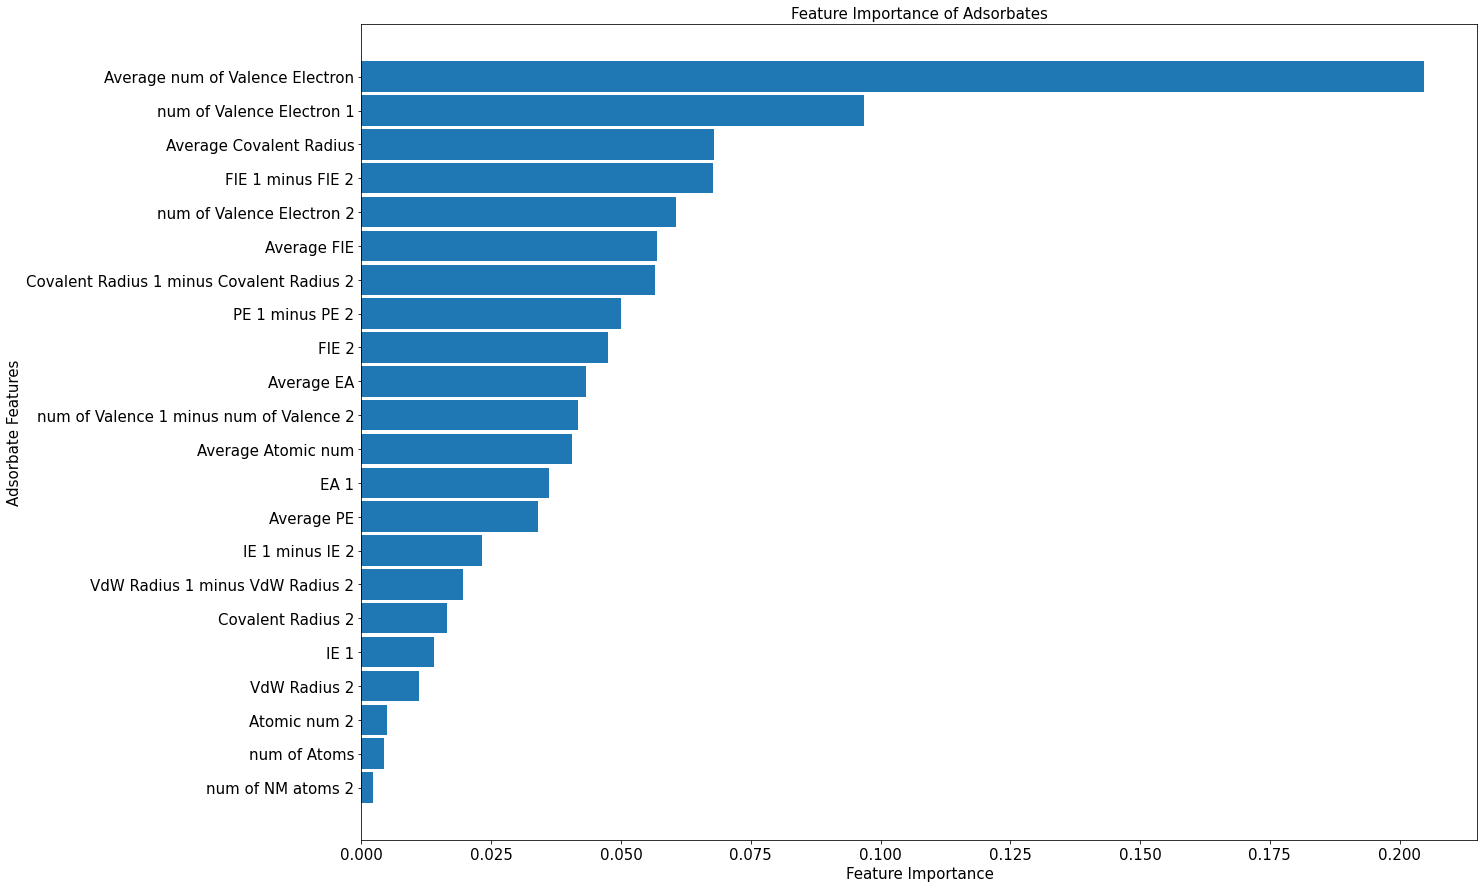

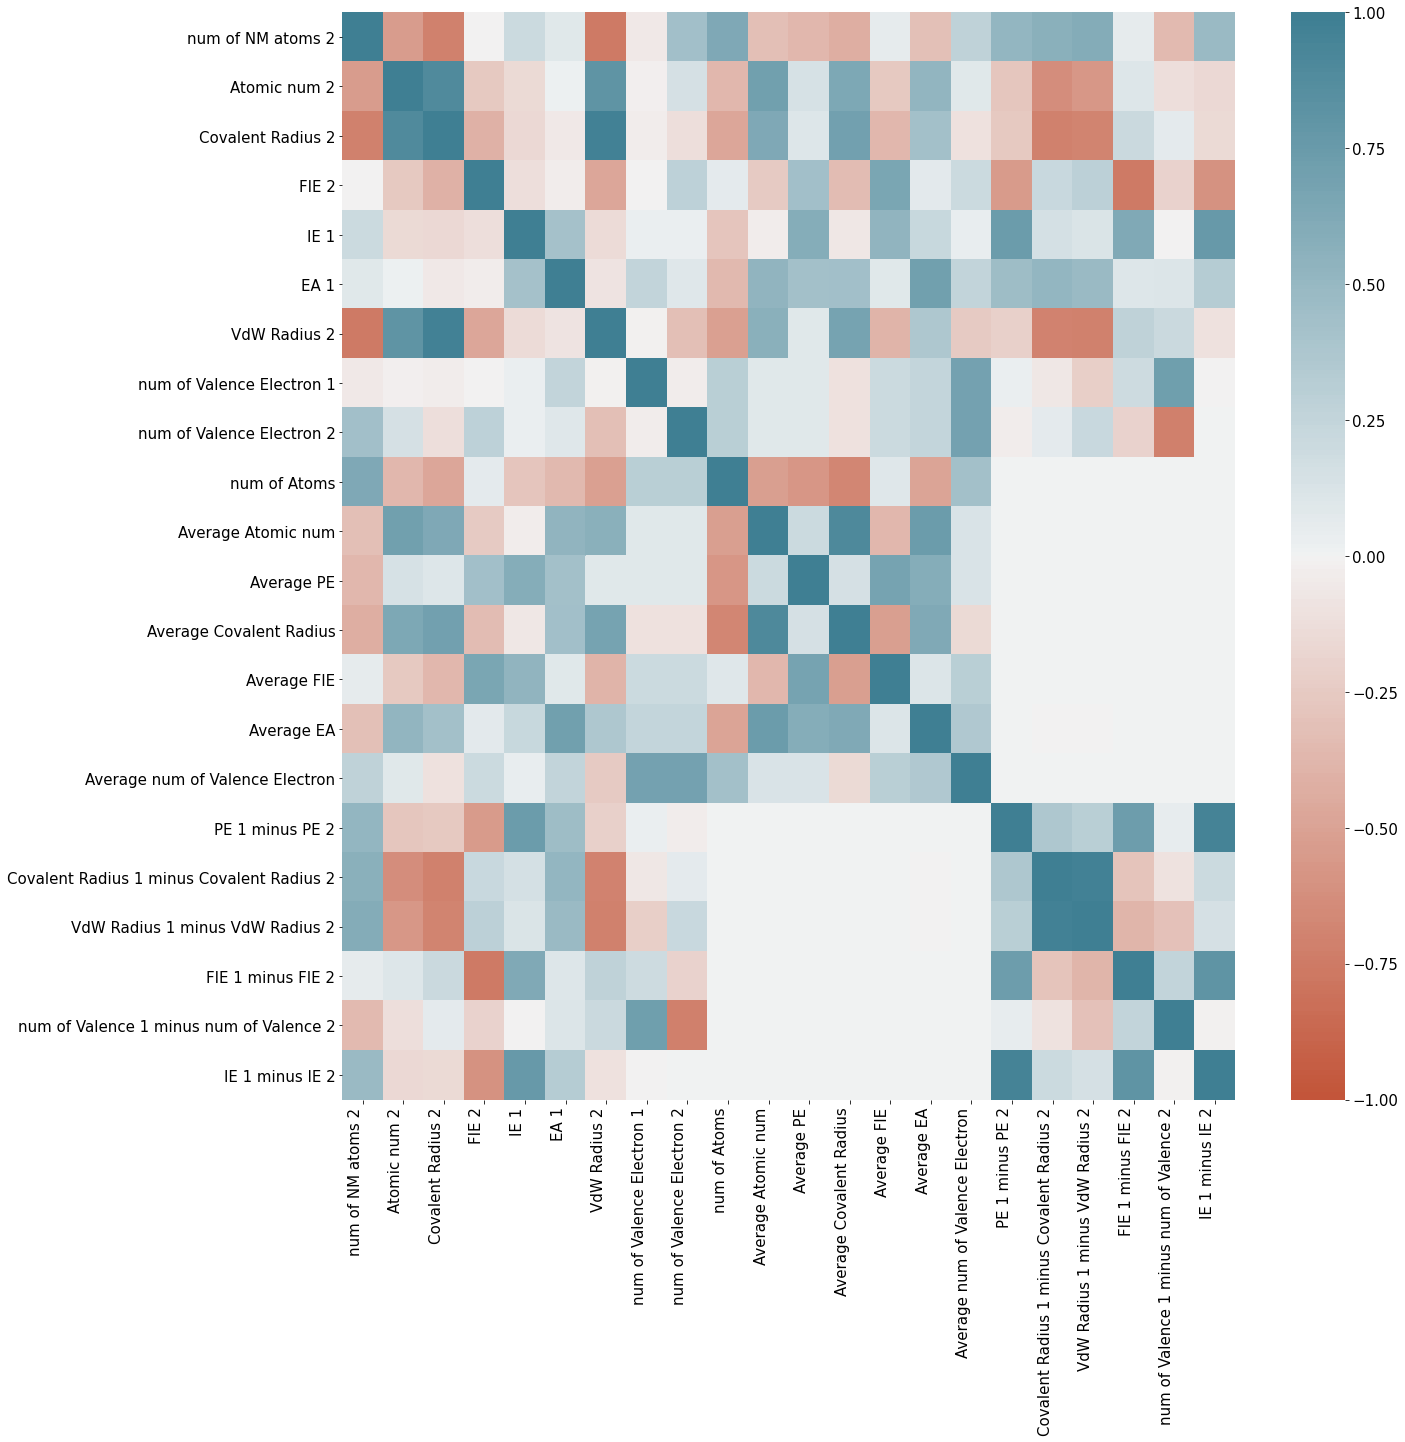

In [29]:
# rd3
df_3=df_2.copy()
# Dropping low ranking or dependent features
df_3 = df_3.drop(columns =['Atomic num 1','Covalent Radius 1 add Covalent Radius 2','PE 2','num of NM atoms 1','Average IE','EA 1 minus EA 2','Average VdW Radius','VdW Radius 1 add VdW Radius 2','FIE 1','Covalent Radius 1','PE 1'])
val_score(df_3, 3, reg_xgbr, results_xgbr, 20)
print(results_xgbr)
# Model performance evalution using CV
val_score(df_3,3, regressors, results_df, 20)
# Check the results of model performance
print(results_df)
# Print a ranking of initial feature importance
feature_importance(XGBRegressor(), df_3)
pearson_correlation(df_3, last=True)

[08:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[08:17:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

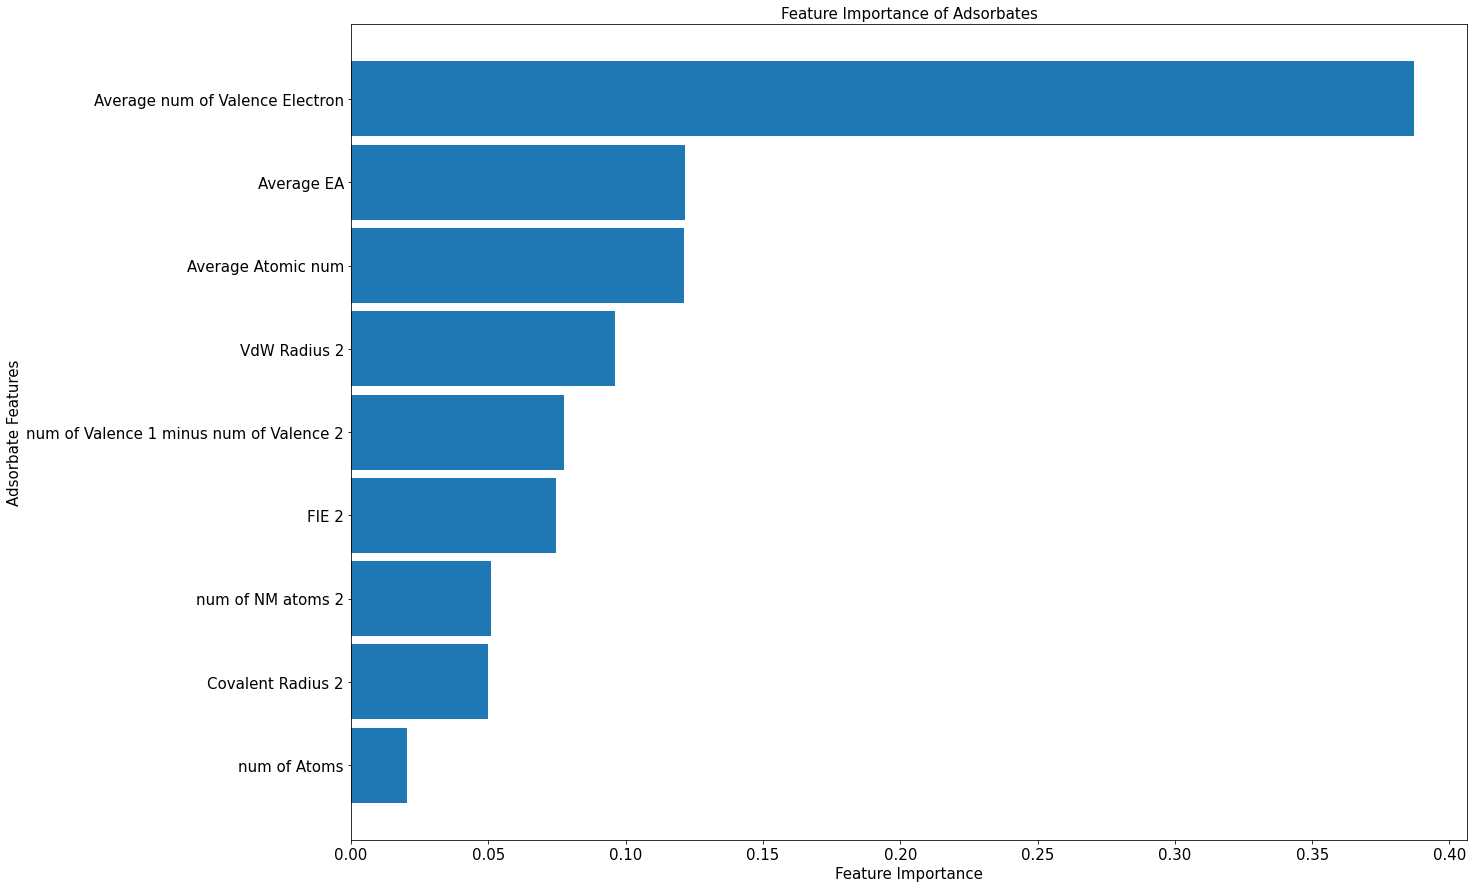

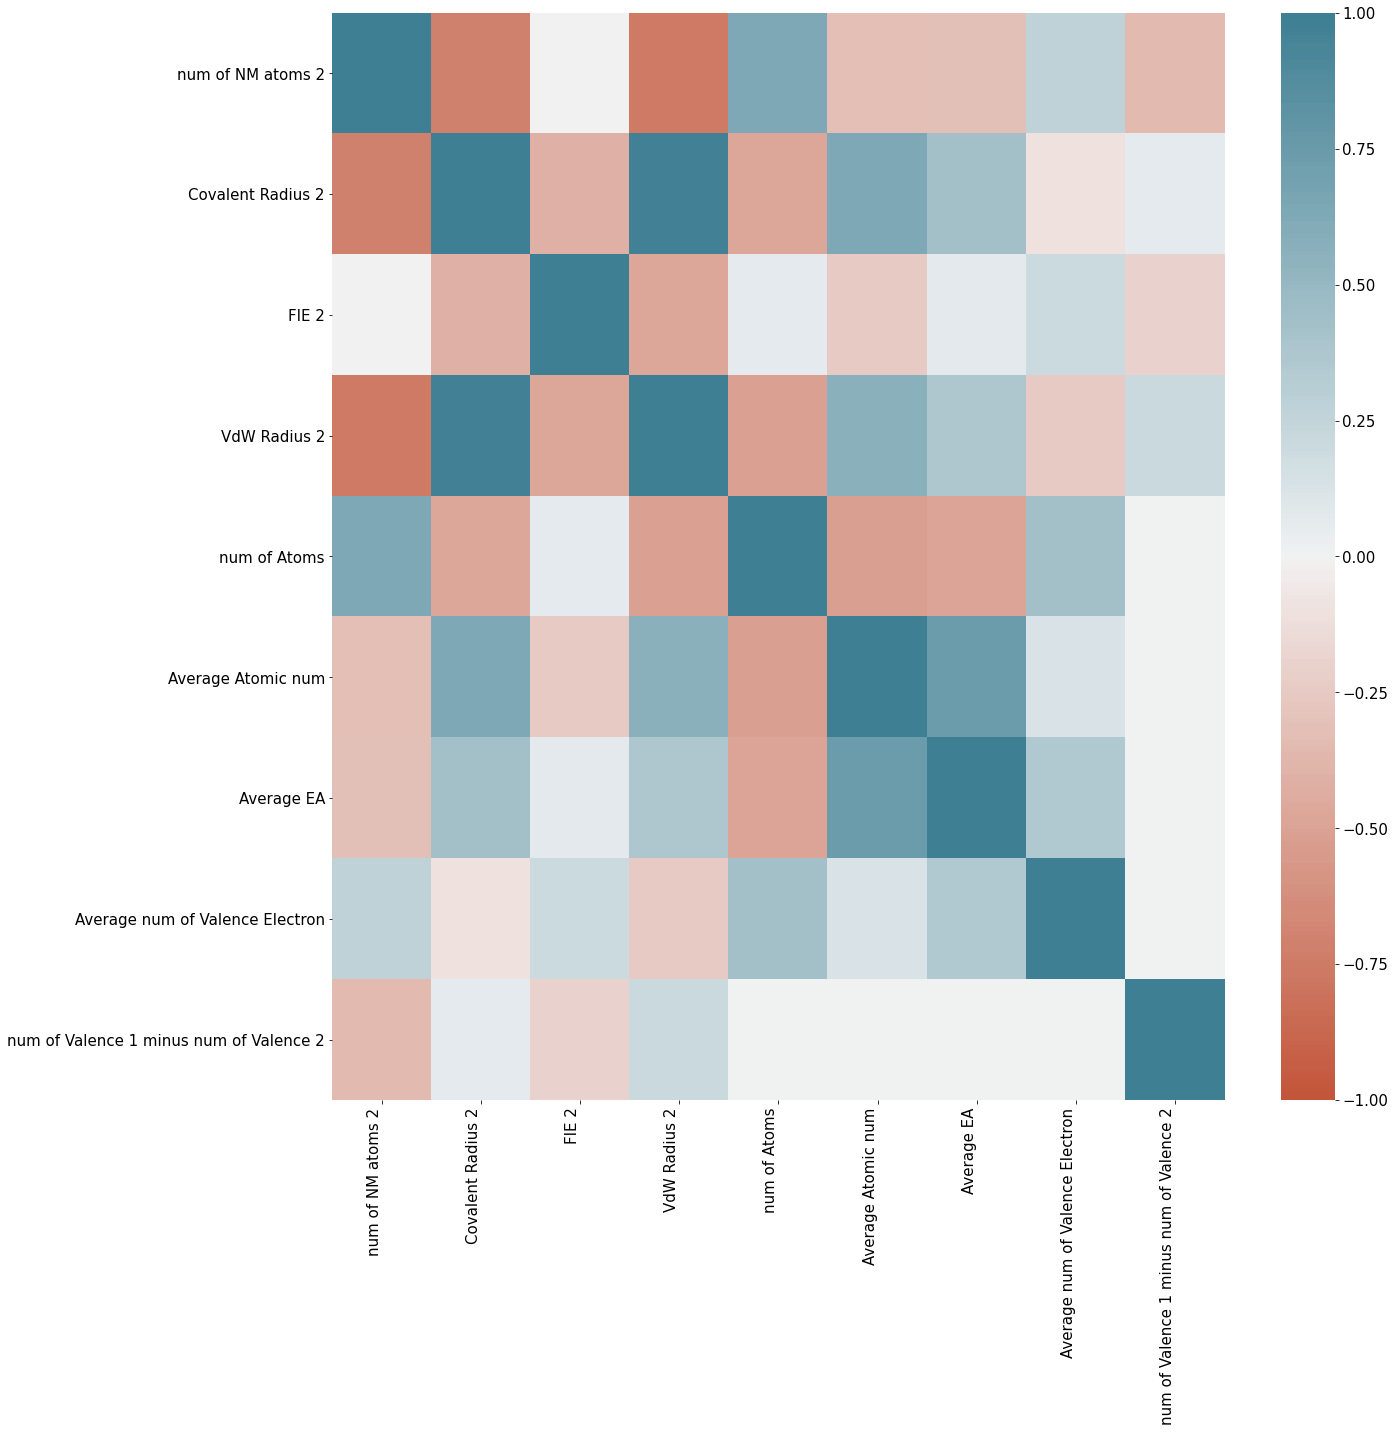

In [30]:
# rd4
df_4=df_3.copy()
# Dropping low ranking or dependent features
df_4 = df_4.drop(columns =['num of Valence Electron 1','IE 1','num of Valence Electron 2','PE 1 minus PE 2','IE 1 minus IE 2','Atomic num 2','FIE 1 minus FIE 2','Covalent Radius 1 minus Covalent Radius 2','EA 1','Average FIE','VdW Radius 1 minus VdW Radius 2','Average Covalent Radius',
                           'Average PE'])
val_score(df_4, 4, reg_xgbr, results_xgbr, 20)
print(results_xgbr)
# Model performance evalution using CV
val_score(df_4,4, regressors, results_df, 20)
# Check the results of model performance
print(results_df)
# Print a ranking of initial feature importance
feature_importance(XGBRegressor(), df_4)
pearson_correlation(df_4, last=True)

[08:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[08:18:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

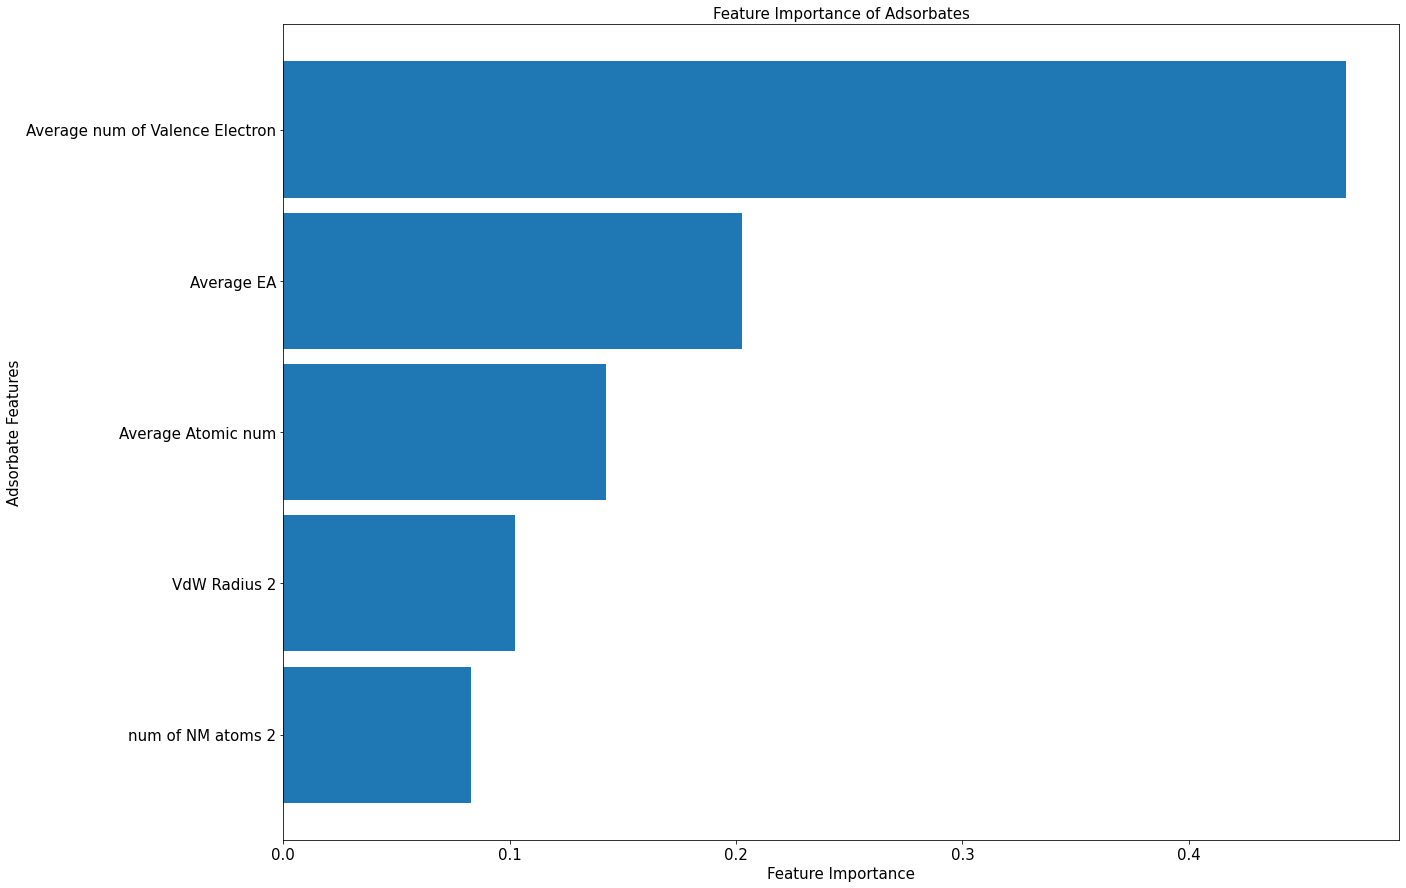

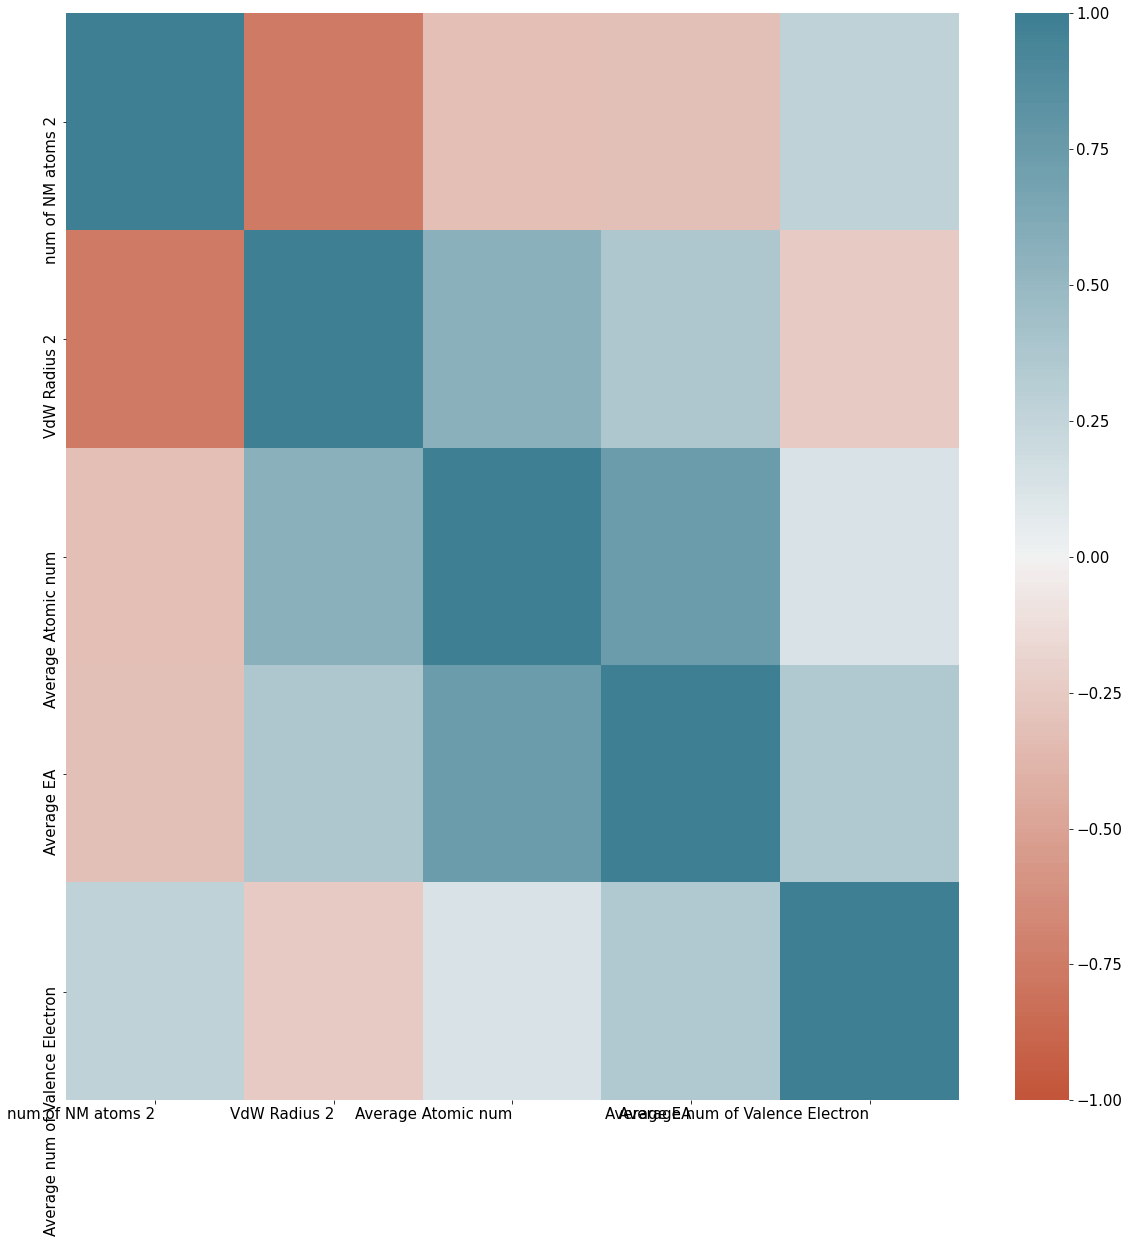

In [31]:
# rd5
df_5=df_4.copy()
# Dropping low ranking or dependent features
df_5= df_5.drop(columns =['FIE 2','num of Atoms', 'num of Valence 1 minus num of Valence 2','Covalent Radius 2'])
val_score(df_5,5, reg_xgbr, results_xgbr, 20)
print(results_xgbr)
# Model performance evalution using CV
val_score(df_5,5, regressors, results_df, 20)
# Check the results of model performance
print(results_df)
# Print a ranking of initial feature importance
feature_importance(XGBRegressor(), df_5)
pearson_correlation(df_5, last=True)

In [32]:
# Get XGBR MAE values
mae_0 = results_df['XGBR'][1][0]
mae_1 = results_df['XGBR'][2][0]
mae_2 = results_df['XGBR'][3][0]
mae_3 = results_df['XGBR'][4][0]
mae_4 = results_df['XGBR'][5][0]

mae = [mae_0, mae_1, mae_2, mae_3, mae_4]

# Get XGBR RMSE values
rmse_0 = results_df['XGBR'][1][1]
rmse_1 = results_df['XGBR'][2][1]
rmse_2 = results_df['XGBR'][3][1]
rmse_3 = results_df['XGBR'][4][1]
rmse_4 = results_df['XGBR'][5][1]

rmse = [rmse_0, rmse_1, rmse_2, rmse_3, rmse_4]

# Get run times
time1 = results_xgbr['Time'][1]
time2 = results_xgbr['Time'][2]
time3 = results_xgbr['Time'][3]
time4 = results_xgbr['Time'][4]
time5 = results_xgbr['Time'][5]

run_time = [time1, time2, time3, time4, time5]

# Get # of features
feature1 = str(results_df['# Features'][1])
feature2 = str(results_df['# Features'][2])
feature3 = str(results_df['# Features'][3])
feature4 = str(results_df['# Features'][4])
feature5 = str(results_df['# Features'][5])

ml_features = [feature1, feature2, feature3, feature4, feature5]


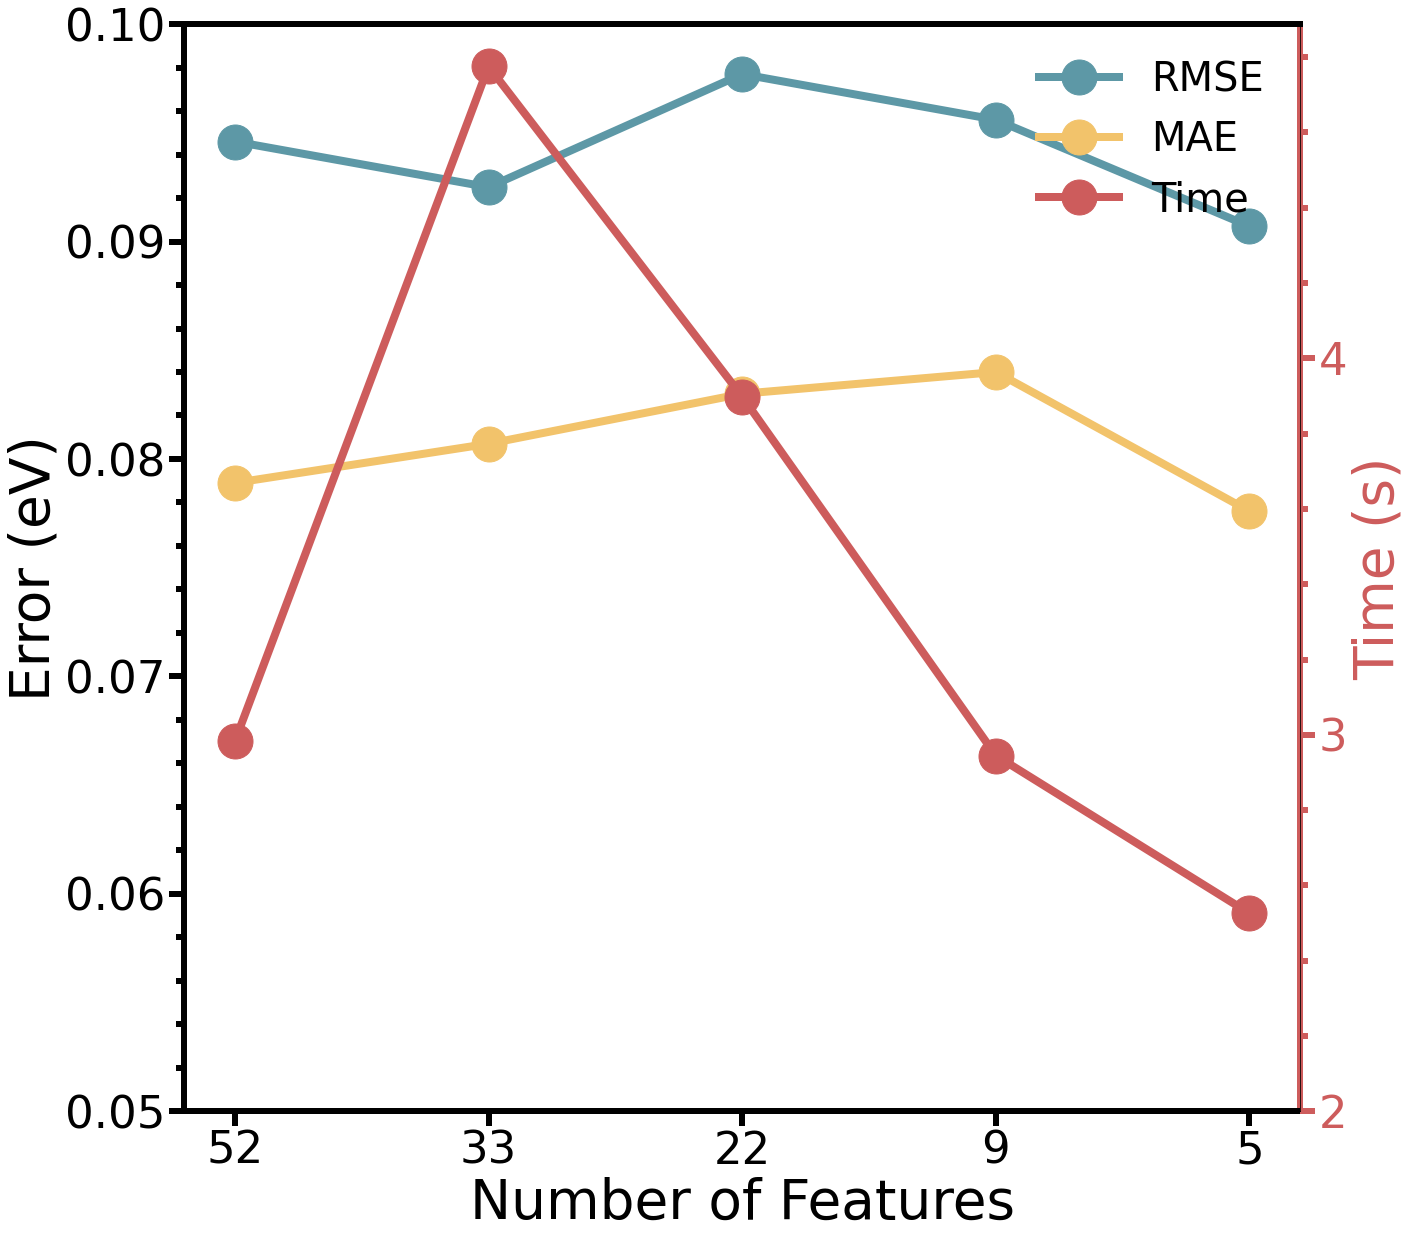

In [33]:
#plot

# Plot figure
ml_features = np.array(ml_features)
run_time = np.array(run_time)
data1 = np.array(rmse)
data2 = np.array(mae)

m1_t = pd.DataFrame({
 'run_time' : run_time,
 'RMSE (eV)' : data1,
 'MAE (eV)' : data2})

fig, ax1 = plt.subplots()

bar1 = ax1.plot(ml_features, m1_t['RMSE (eV)'], color='#5D98A6', label='RMSE', 
                marker = 'o', linewidth = 8, markersize = 35)
bar2 = ax1.plot(ml_features, m1_t['MAE (eV)'], color='#F2C36B', label='MAE', 
                marker = 'o', linewidth = 8, markersize = 35)

ax1.set_xticklabels(ml_features)
ax1.tick_params(axis='y', labelcolor='black', labelsize = 45, width=6, length=15, color='black', which='major')
ax1.tick_params(axis='x', labelcolor='black', labelsize = 45, width=6, length=15, color='black', which='major')
ax1.tick_params(axis='y', labelcolor='black', labelsize = 45, width=6, length=8, color='black', which="minor")

ax1.minorticks_on()
ax1.set_yticks([0.05, 0.06, 0.07, 0.08, 0.09, 0.1])

ax2 = ax1.twinx()

linecolor = '#CD5C5C'
time = ax2.plot(ml_features, m1_t['run_time'], marker = 'o', color = linecolor, label='Time', linewidth = 8, markersize = 35)
ax2.tick_params(axis='y', labelcolor=linecolor, labelsize = 45, width=6, length=15, color=linecolor, which='major')
ax2.tick_params(axis='y', labelcolor=linecolor, labelsize = 45, width=6, length=8, color=linecolor, which="minor")

lns = bar1+bar2+time
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0, fontsize=40, frameon=False)


ax1.set_xlabel('Number of Features', size = 55)
ax1.set_ylabel('Error (eV)', color='black', size = 55)
ax2.set_ylabel('Time (s)', color=linecolor, size = 55)
ax2.minorticks_on()
ax2.set_yticks([2, 3, 4])

for axis in ['top','bottom','left','right']:
    if axis == 'right':
        ax1.spines[axis].set_color(linecolor)
    ax1.spines[axis].set_linewidth(6)

plt.savefig('{}dim_feature_selection.png'.format(image_directory),dpi=600, bbox_inches = "tight")
plt.show()

In [34]:
# Save errors to csv
results_df.to_csv('CO Dimerization Errors.csv')

[08:18:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


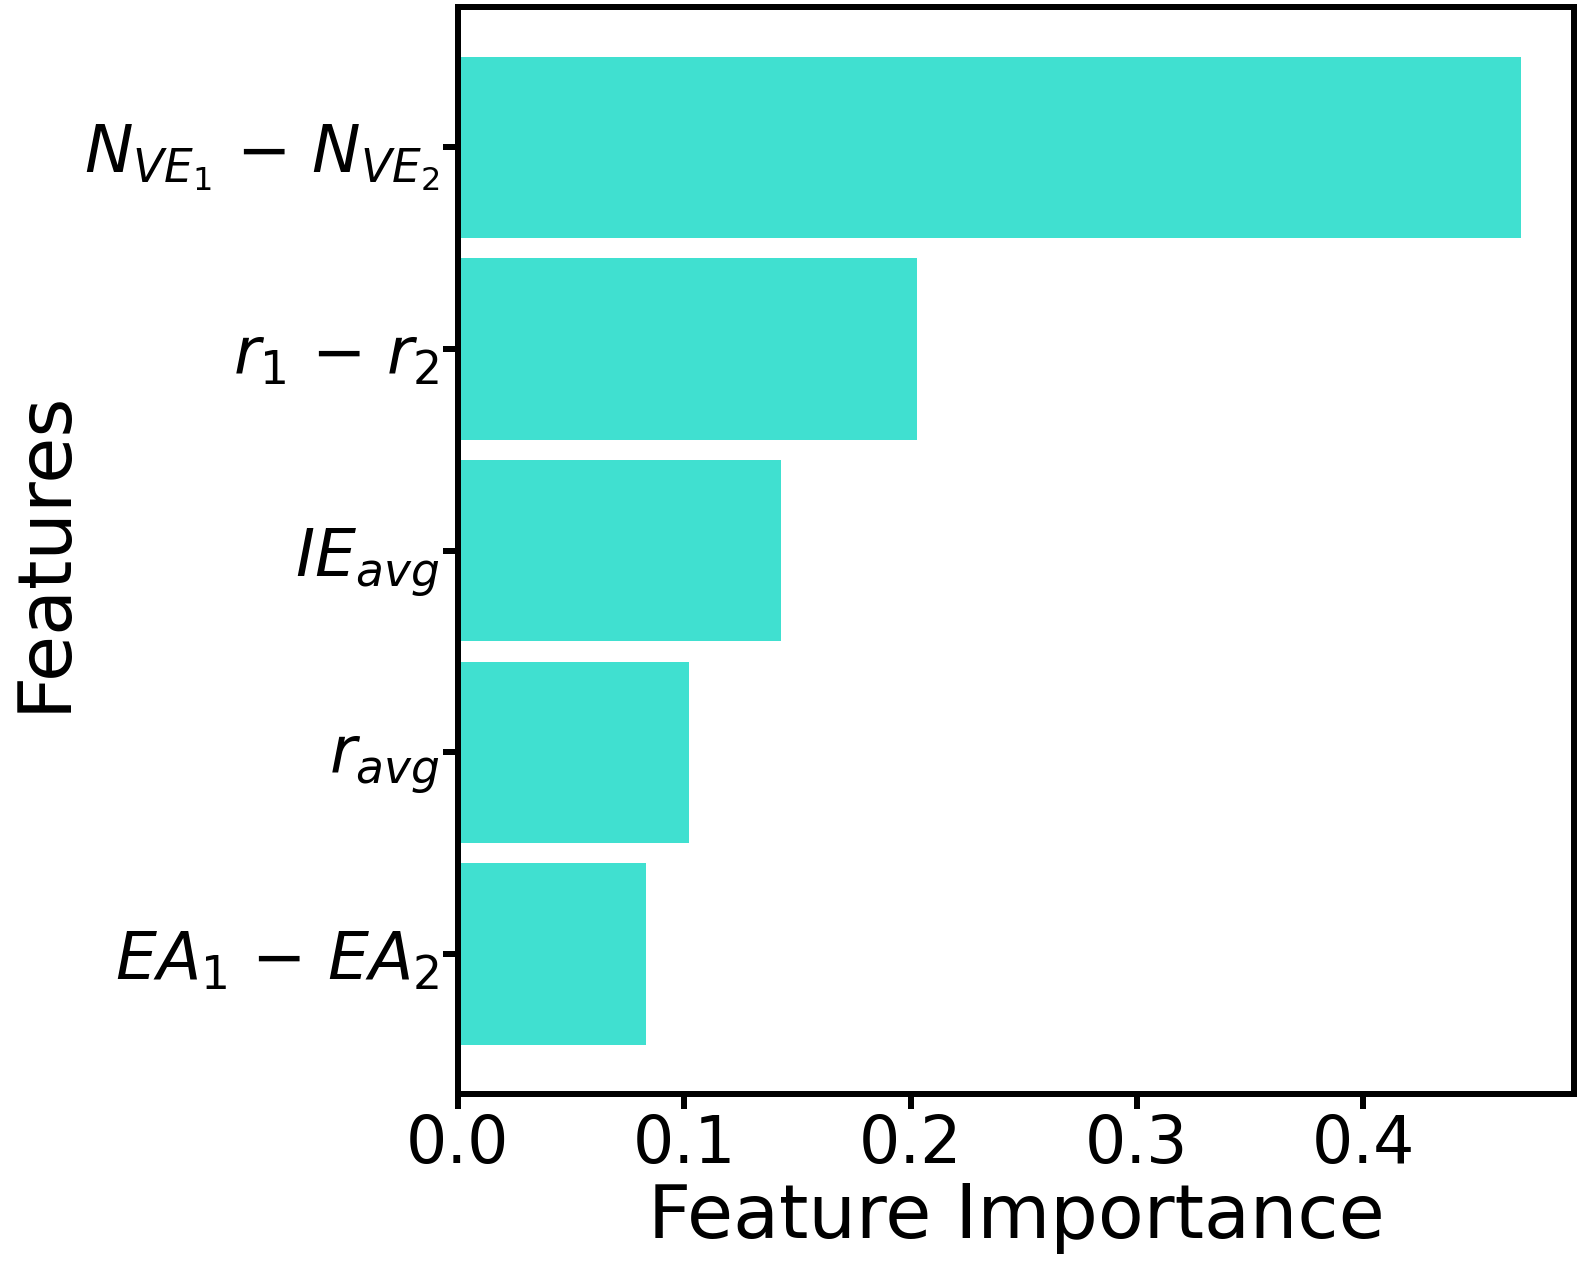

In [35]:
# Plot final feature importance figure

importance_labels = ['$N_{VE_{avg}}$', '$N_{VE_{1}}$ $-$ $N_{VE_{2}}$', '$r_1$ $-$ $r_2$', '$IE_{avg}$', 
                     '$r_{avg}}$',  '$EA_{1}$ $-$ $EA_{2}$']
importance_labels = reversed(importance_labels)

features = df_5.iloc[:, 0:-1]
target = df_5.iloc[:, -1]

xgbr.fit(features, target)

importance = xgbr.feature_importances_
features = df_5.columns[0:-1]

col = zip(features, importance)

# sort and save features based on its importance into a dataframe
importance_data = pd.DataFrame(col, columns=['feature', 'importance'])
importance_data_asc = importance_data.sort_values('importance')

# plot the importance data
fig, ax = plt.subplots()
plt.barh(y=importance_data_asc['feature'], width=importance_data_asc['importance'], height=0.9, color='turquoise')
ax.set_yticklabels(importance_labels)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(6)

ax.tick_params(axis='x', colors='black', width=6, length=15, color='black')
ax.tick_params(axis='y', colors='black', width=6, length=15, color='black')    

ax.set_xlabel("Feature Importance", fontsize = 75)
ax.set_ylabel("Features", fontsize = 75)

ax.tick_params(axis='x', colors='black', labelsize = 65, width=6, length=15, color='black')
ax.tick_params(axis='y', colors='black', labelsize = 65, width=6, length=15, color='black')

plt.savefig('{}dim_final_features.png'.format(image_directory),dpi=600, bbox_inches = "tight")
plt.show();

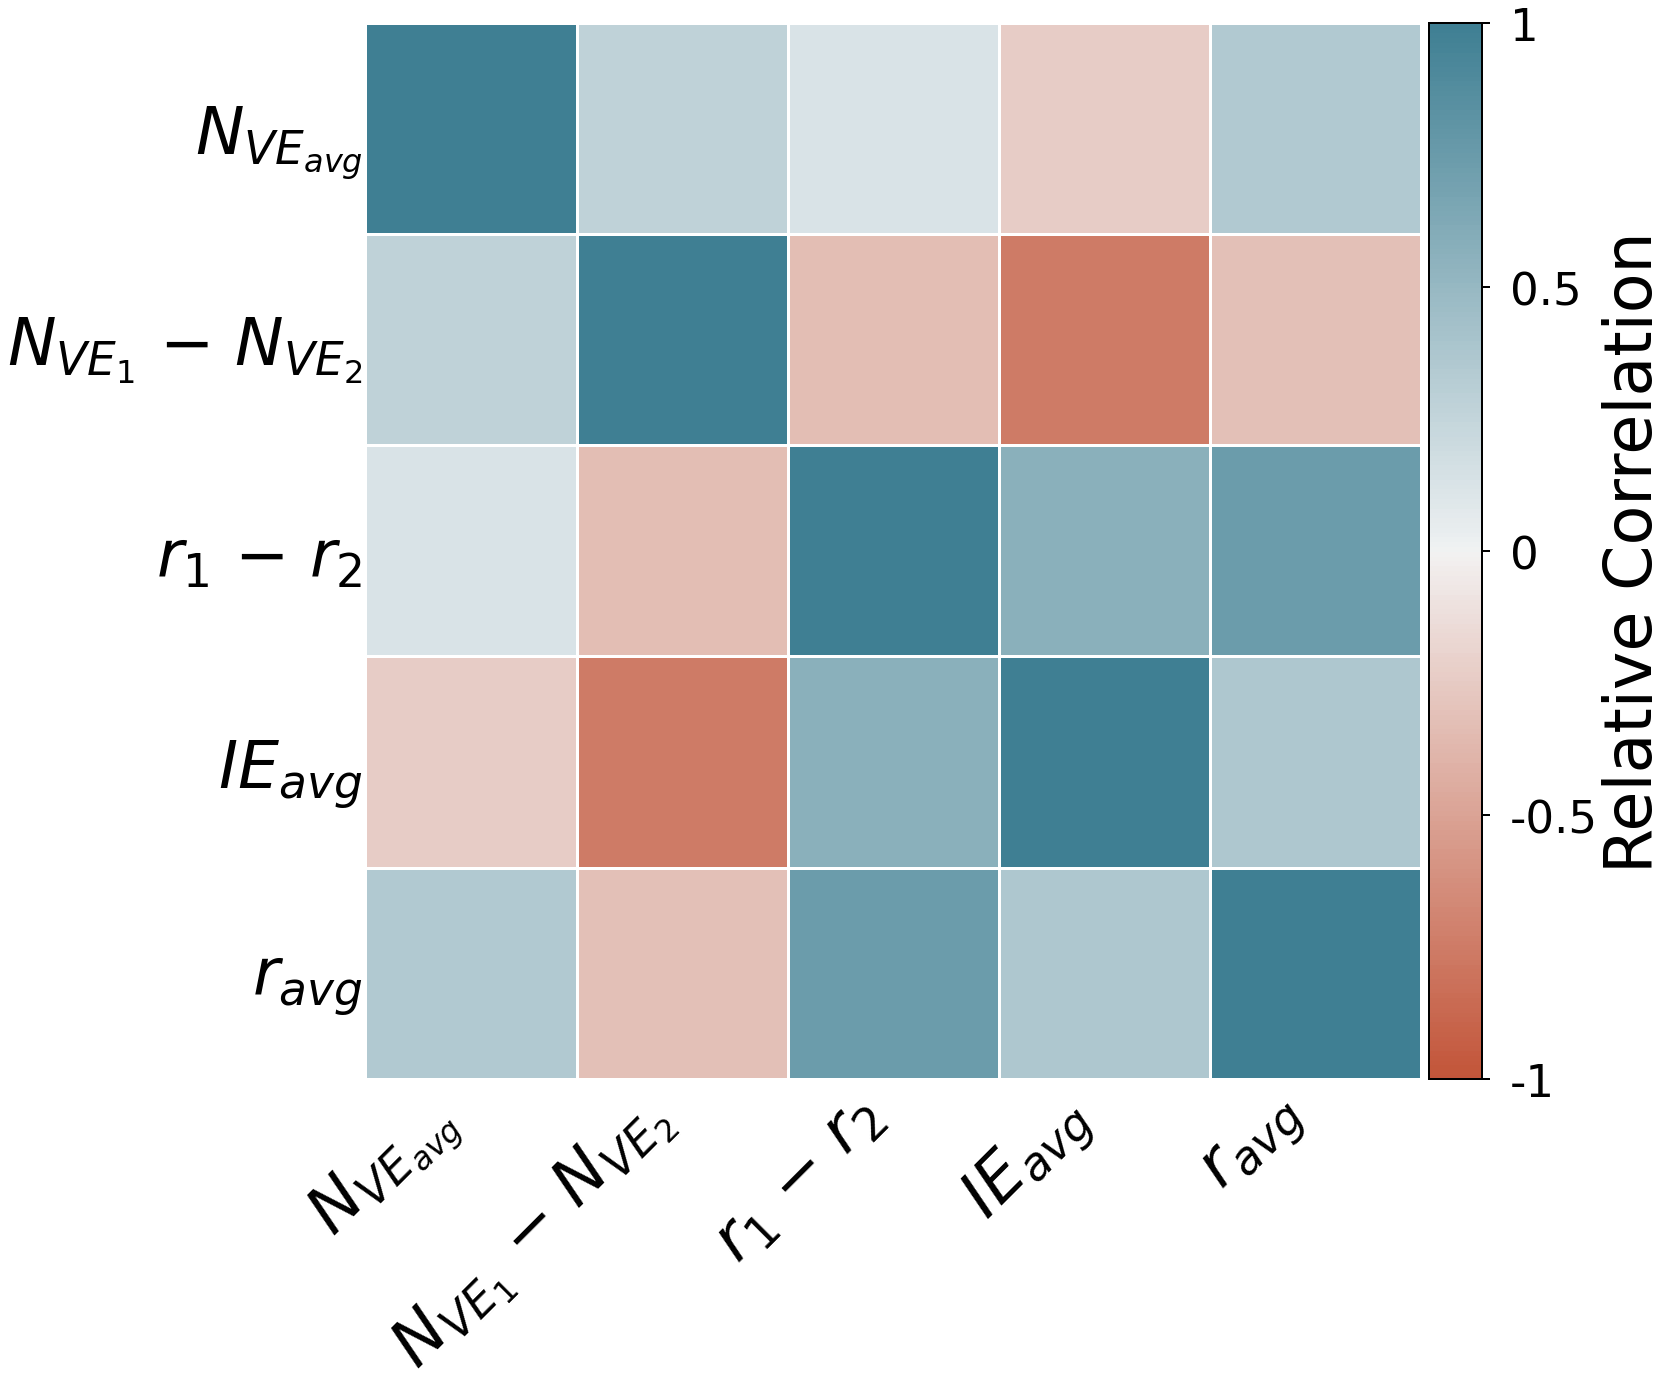

In [36]:
# Plot final correlation figure
from mpl_toolkits.axes_grid1 import make_axes_locatable

corr_labels = ['$N_{VE_{avg}}$', '$N_{VE_{1}}$ $-$ $N_{VE_{2}}$', '$r_1$ $-$ $r_2$', '$IE_{avg}$', 
                     '$r_{avg}}$',  '$EA_{1}$ $-$ $EA_{2}$']

data = df_5.iloc[:, :-1].corr()
data = data[['Average num of Valence Electron','num of NM atoms 2','Average Atomic num'
              ,'VdW Radius 2','Average EA']]
data = data.reindex(['Average num of Valence Electron','num of NM atoms 2','Average Atomic num'
              ,'VdW Radius 2','Average EA'])
#sns.set(font_scale=4)

ax = sns.heatmap(data, linewidth=2,
                 cmap = sns.diverging_palette(20, 220, n=220), square = True, vmin = -1, vmax = 1,
                 cbar=False)
plt.xticks(ha='right')
  
#ax.figure.axes[-1].yaxis.label.set_size(35)

divider = make_axes_locatable(ax) 
cax = divider.append_axes("right", size="5%", pad=0.1) 
cbar = plt.colorbar(ax.collections[0], cax=cax)
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.ax.set_yticklabels(['-1', '-0.5', '0', '0.5', '1'], size=45)
cbar.ax.set_ylabel("Relative Correlation", fontsize = 65)
cbar.ax.tick_params(axis='y', which='major', length=8, width = 2, pad=20)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)


    
ax.set_xticklabels(corr_labels, rotation = 45, size = 65)
ax.set_yticklabels(corr_labels, rotation = 0, size = 65)

ax.tick_params(axis='x', labelcolor='black', labelsize = 65, width=0, length=0, color='black') 
ax.tick_params(axis='y', labelcolor='black', labelsize = 65, width=0, length=0, color='black') 

plt.savefig('{}dim_feature_correlation.png'.format(image_directory),dpi=600, bbox_inches = "tight")
plt.show()

#4. XGBR Hyperparameter Tuning

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import xgboost
import lightgbm


In [38]:
features = df_5.iloc[:, 0:-1]
target = df_5.iloc[:, -1]

In [39]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedKFold


# Defining XGBR hyperparameters
xgbr_grid = {
    
    'min_child_weight': [1, 5, 10],
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.3, 1, 2],
    'colsample_bytree': [0.1, 0.5, 0.8, 1],
    'colsample_bylevel': [0.1, 0.5, 0.8, 1],

}

# Defining fold parameters
fold = RepeatedKFold(n_splits = 15, n_repeats = 1, random_state = 50)

In [40]:
# Performing Randomized CV search on XGBR
xgbr_grid_cv = GridSearchCV(estimator = xgbr, cv = fold,
            param_grid = xgbr_grid, n_jobs = -1, scoring='neg_root_mean_squared_error',
            verbose = 5, return_train_score = True)

In [41]:
xgbr_grid_cv.fit(features, target)

Fitting 15 folds for each of 1728 candidates, totalling 25920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 1112 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 2120 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 3416 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 5000 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6872 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9032 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 11480 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 14216 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 17240 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 20552 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 24152 tasks      | elapsed:  5.2min


[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 25920 out of 25920 | elapsed:  5.6min finished


GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=15, random_state=50),
             error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    o...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bylevel': [0.1, 0.5, 0.8, 1],
                         'colsample_bytree': [0.1, 0.5, 0.8, 1],
                         'learnin

In [42]:
from sklearn.model_selection import cross_val_score

xgbr_optimized = xgbr_grid_cv.best_estimator_

rmse_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_root_mean_squared_error')
mae_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_mean_absolute_error')

print(rmse_score)
print(mae_score)

[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [43]:
optimized_xgbr_rmse = np.abs(rmse_score).mean()
optimized_xgbr_mae = np.abs(mae_score).mean()

print(optimized_xgbr_rmse)
print(optimized_xgbr_mae)

0.0884800892018371
0.07568933218123551


# 5. Analysis of Separation Ratios

In [44]:
from sklearn.model_selection import train_test_split

r2 = []
rmse = []
mae = []


for i in [0.5, 0.667, 0.75, 0.8, 0.83, 0.857, 0.875, 0.889, 0.9]:
    r2_temp = []
    rmse_temp = []
    mae_temp = []
    for j in range(50):
        X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = i, random_state = j)
        xgbr.fit(X_train, y_train)

        # Predicting training data
        train_data = X_train.copy()
        train_data['G_co (eV)'] = y_train.copy()
        train_data['prediction'] = xgbr.predict(train_data.iloc[:, :-1])    

        # Predicting testing data
        test_data = X_test.copy()
        test_data['G_co (eV)'] = y_test.copy()
        test_data['prediction'] = xgbr.predict(test_data.iloc[:, :-1])
        test_data['mae_error'] = np.abs(test_data['G_co (eV)'] - test_data['prediction'])
        test_data['rmse_error'] = (test_data['G_co (eV)'] - test_data['prediction']) ** 2

        mae_temp.append(test_data['mae_error'].mean())
        rmse_temp.append(np.sqrt(test_data['rmse_error'].mean()))

        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # Calculate R Squared
        coeffs = np.polyfit(x, y, 1)
        p = np.poly1d(coeffs)

        ybar = np.sum(y) / len(y)
        ssreg = np.sum((p(x) - ybar) ** 2)
        sstot = np.sum((y - ybar) ** 2)
        Rsqr = ssreg / sstot

        r2_temp.append(Rsqr)
    
    r2.append(np.array(r2_temp).mean())
    rmse.append(np.array(rmse_temp).mean())
    mae.append(np.array(mae_temp).mean())

[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

# Training/Testing Ratio Plot

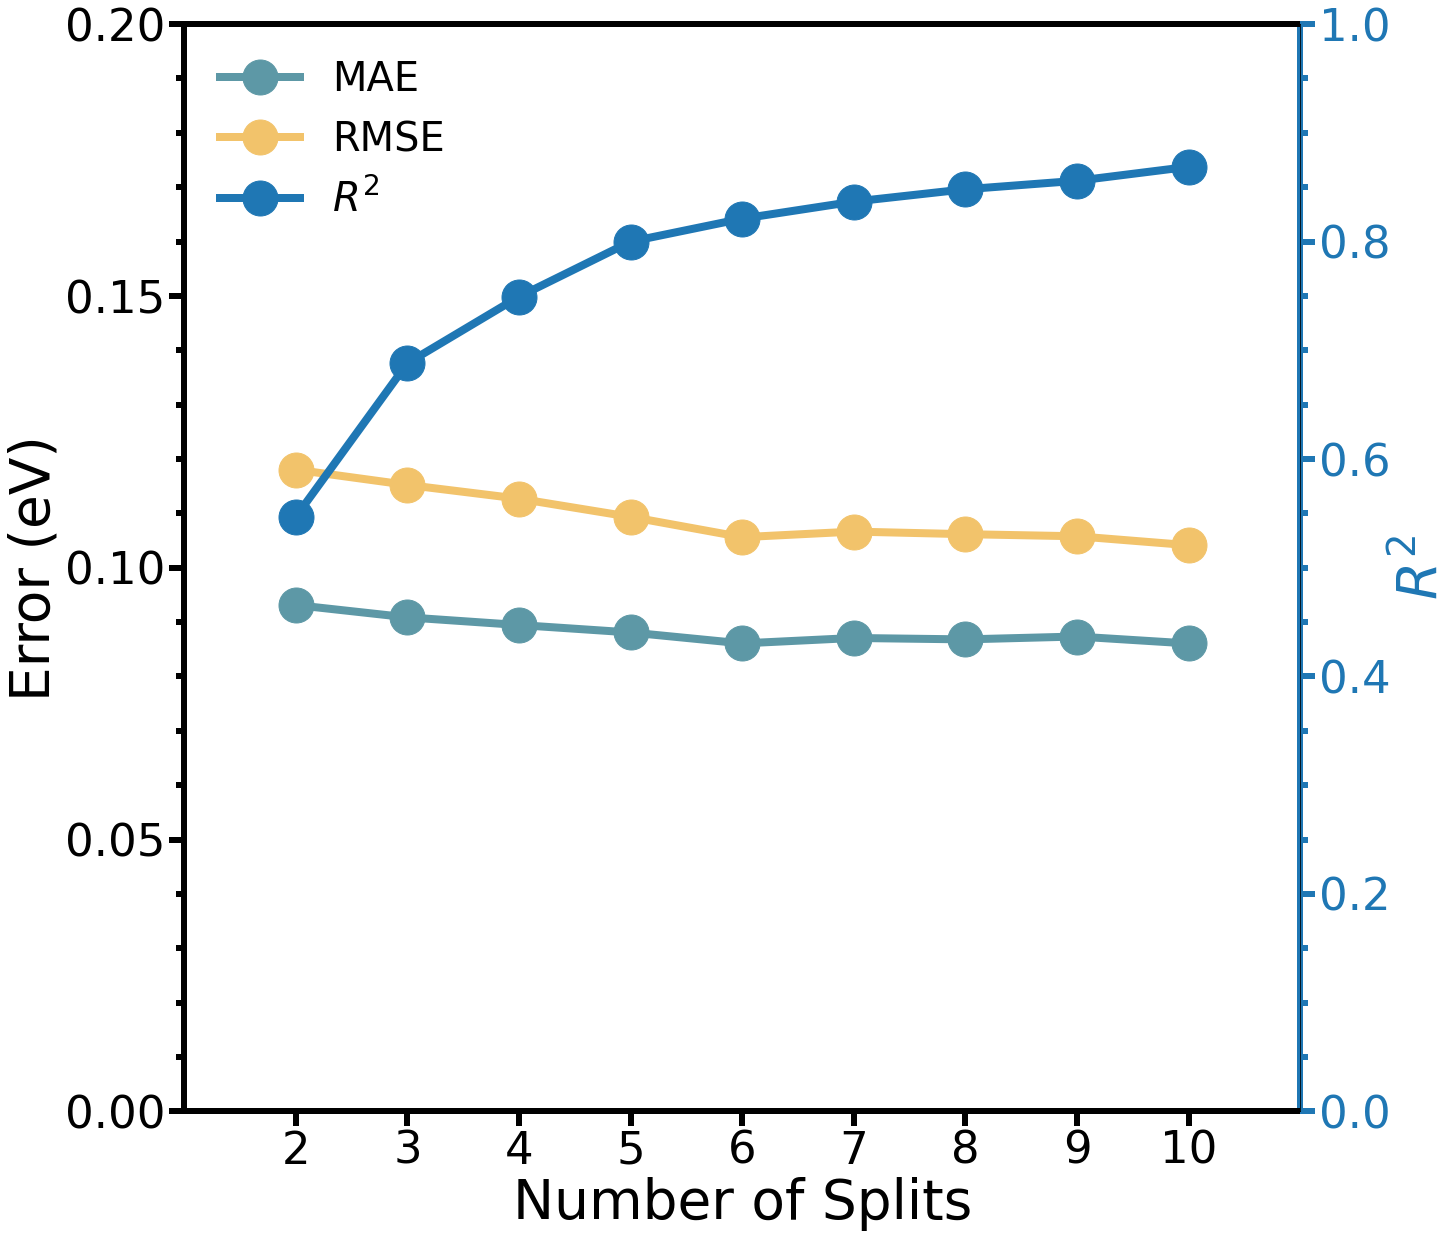

In [45]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

t = [2, 3, 4, 5, 6, 7, 8, 9, 10]
data1 = mae
data2 = r2
data3 = rmse

fig, ax1 = plt.subplots()

ax1.set_xlabel('Number of Splits', size = 55)
ax1.set_ylabel('Error (eV)', color='black', size = 55)
line1 = ax1.plot(t, data1, color='#5D98A6', marker = 'o', linewidth = 8, markersize = 35, label = 'MAE')
line2 = ax1.plot(t, data3, color='#F2C36B', marker = 'o', linewidth = 8, markersize = 35, label = 'RMSE')
ax1.tick_params(axis='y', labelcolor='black', labelsize = 45, width=6, length=15, color='black', which="major")
ax1.tick_params(axis='y', labelcolor='black', labelsize = 45, width=6, length=8, color='black', which="minor")

ax1.tick_params(axis='x', colors='black', labelsize = 45, width=6, length=15, color='black')
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(6)


ax1.minorticks_on()
ax1.set_yticks([0, 0.05, 0.1, 0.15, 0.2])
ax1.set_xticks([2, 3, 4, 5, 6, 7, 8, 9, 10])
ax1.set_xticklabels([2, 3, 4, 5, 6, 7, 8, 9, 10])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$R^2$', color=color, size = 55)  # we already handled the x-label with ax1
line3 = ax2.plot(t, data2, color=color, marker = 'o', linewidth = 8, markersize = 35, label = '$R^2$')
ax2.tick_params(axis='y', labelcolor=color, labelsize = 45, width=6, length=15, color=color, which='major')
ax2.tick_params(axis='y', labelcolor=color, labelsize = 45, width=6, length=8, color=color, which="minor")

lns = line1+line2+line3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0, fontsize=40, frameon=False)

for axis in ['top','bottom','left','right']:
    if axis == 'right':
        ax1.spines[axis].set_color(color)
    ax1.spines[axis].set_linewidth(6)

ax2.minorticks_on()
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xlim(1, 11)
plt.ylim(0, 1);

plt.savefig('{}dim_train_split.png'.format(image_directory),dpi=600, bbox_inches = "tight")
plt.show()

#6. Neural Network Implementation

In [46]:
from sklearn.model_selection import train_test_split

# Split training data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.9, random_state = 50)

In [47]:
import time

# Training neural network to minimize RMSE
start = time.time()
model_history_rmse = train_model_rmse(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 34ms/step - loss: 0.0968 - val_loss: 0.1072

Epoch 00351: val_loss did not improve from 0.08488
Epoch 352/1600
1/1 [==============================] - 0s 38ms/step - loss: 0.0831 - val_loss: 0.1074

Epoch 00352: val_loss did not improve from 0.08488
Epoch 353/1600
1/1 [==============================] - 0s 29ms/step - loss: 0.1034 - val_loss: 0.1047

Epoch 00353: val_loss did not improve from 0.08488
Epoch 354/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0910 - val_loss: 0.1048

Epoch 00354: val_loss did not improve from 0.08488
Epoch 355/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0798 - val_loss: 0.1051

Epoch 00355: val_loss did not improve from 0.08488
Epoch 356/1600
1/1 [==============================] - 0s 33ms/step - loss: 0.0893 - val_loss: 0.1065

Epoch 00356: val_loss did not improve from 0.08488
Epoch 357/1600
1/1 [==========================

In [48]:
# Find the minimum RMSE
nn_RMSE = min(model_history_rmse.history['val_loss'])

In [49]:
# Training neural network to minimize MAE
start = time.time()
model_history_mae = train_model_mae(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 29ms/step - loss: 0.0736 - val_loss: 0.0770

Epoch 00351: val_loss did not improve from 0.05938
Epoch 352/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0669 - val_loss: 0.0797

Epoch 00352: val_loss did not improve from 0.05938
Epoch 353/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0829 - val_loss: 0.0807

Epoch 00353: val_loss did not improve from 0.05938
Epoch 354/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0742 - val_loss: 0.0827

Epoch 00354: val_loss did not improve from 0.05938
Epoch 355/1600
1/1 [==============================] - 0s 31ms/step - loss: 0.0731 - val_loss: 0.0848

Epoch 00355: val_loss did not improve from 0.05938
Epoch 356/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.0702 - val_loss: 0.0847

Epoch 00356: val_loss did not improve from 0.05938
Epoch 357/1600
1/1 [==========================

In [50]:
# Find the minimum MAE
nn_MAE = min(model_history_mae.history['val_loss'])

#Training/Validation Curves Final Figure

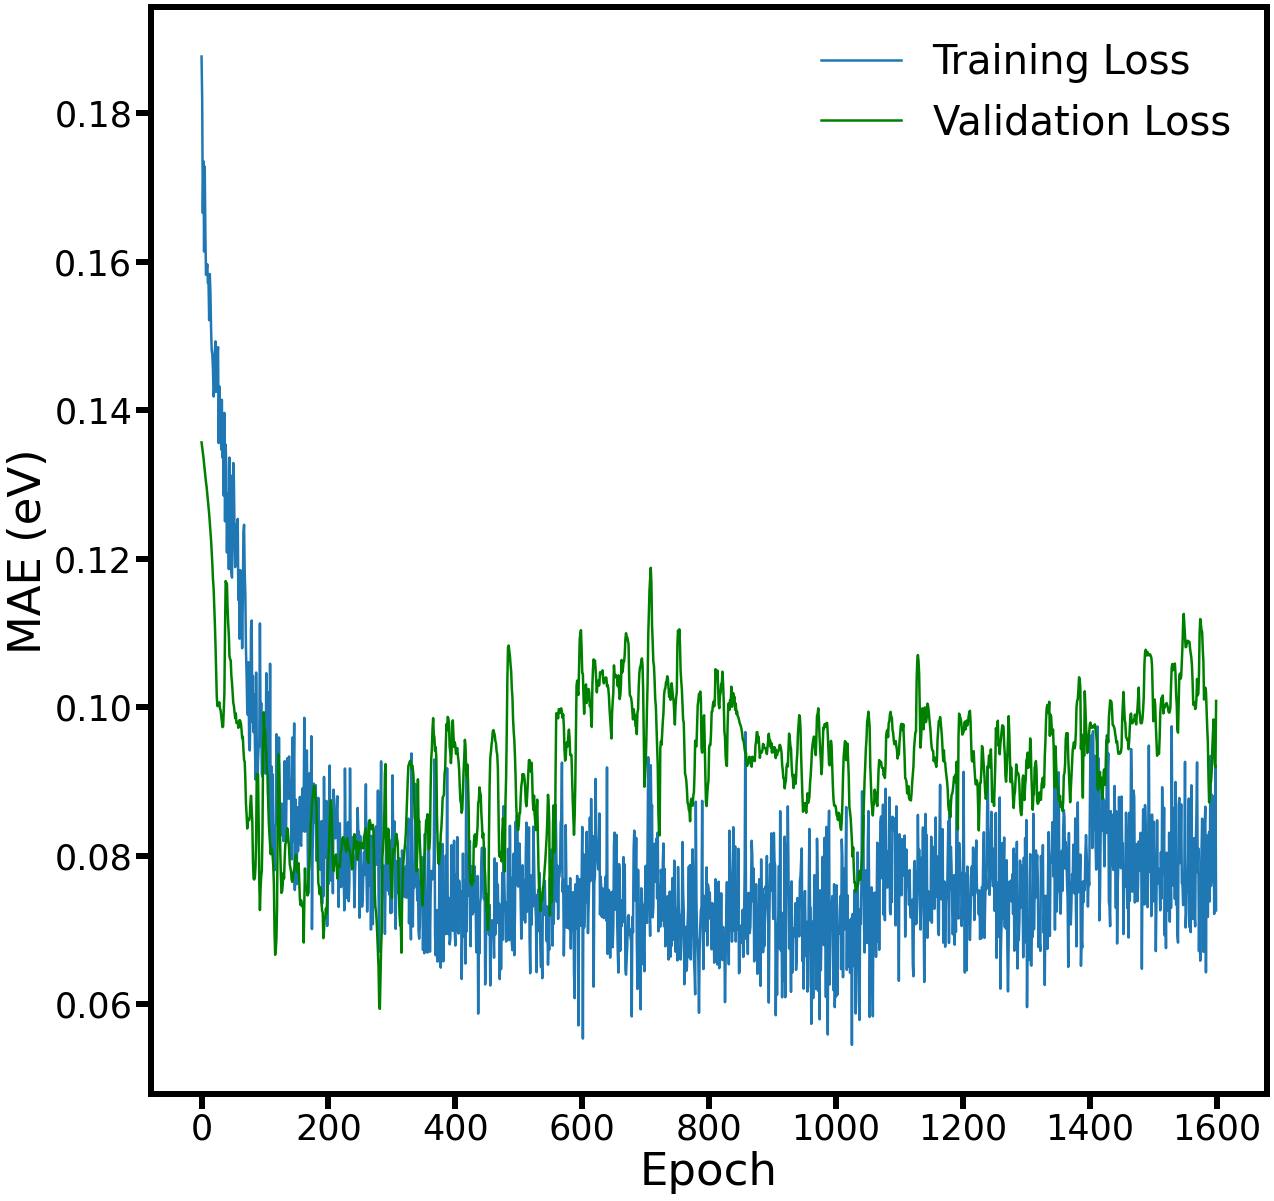

In [51]:
training_losses = model_history_mae.history['loss']
validation_losses = model_history_mae.history['val_loss']

fig, ax = plt.subplots()
plt.plot(training_losses, label="Training Loss", linewidth = 2.5)
plt.plot(validation_losses, label="Validation Loss", linewidth = 2.5, c='g')
#plt.title('Learning Curve', fontsize = 20)
ax.set_xlabel('Epoch', fontsize = 45)
ax.set_ylabel('MAE (eV)', fontsize = 45)

ax.tick_params(axis='x', colors='black', labelsize = 35, width=6, length=15, color='black')
ax.tick_params(axis='y', colors='black', labelsize = 35, width=6, length=15, color='black')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(6)

plt.savefig('{}dim_nn_mae.png'.format(image_directory),dpi=600, bbox_inches = "tight")
plt.legend(frameon=False, fontsize = 40);

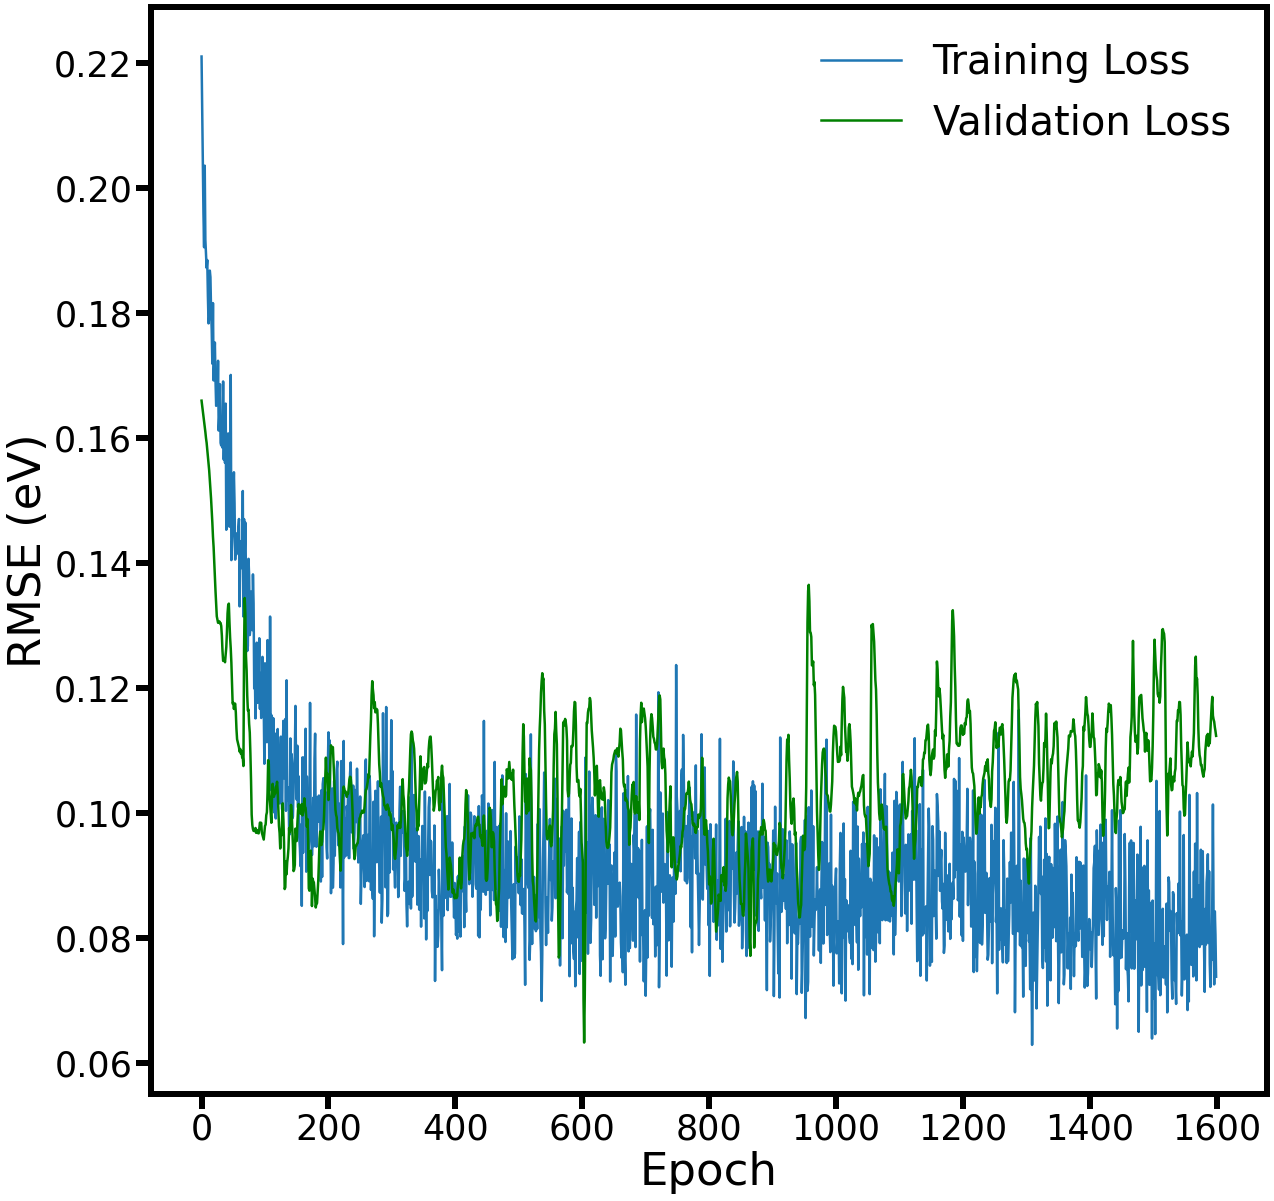

In [52]:
training_losses = model_history_rmse.history['loss']
validation_losses = model_history_rmse.history['val_loss']

fig, ax = plt.subplots()
plt.plot(training_losses, label="Training Loss", linewidth = 2.5)
plt.plot(validation_losses, label="Validation Loss", linewidth = 2.5, c='g')
#plt.title('Learning Curve', fontsize = 20)
ax.set_xlabel('Epoch', fontsize = 45)
ax.set_ylabel('RMSE (eV)', fontsize = 45)

ax.tick_params(axis='x', colors='black', labelsize = 35, width=6, length=15, color='black')
ax.tick_params(axis='y', colors='black', labelsize = 35, width=6, length=15, color='black')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(6)

plt.savefig('{}dim_nn_rmse.png'.format(image_directory),dpi=600, bbox_inches = "tight")
plt.legend(frameon=False, fontsize = 40);

#7. Regressor Performance Plots

In [53]:
# Train on models
GBR.fit(X_train, y_train)
KNR.fit(X_train, y_train)
RFR.fit(X_train, y_train)
SR.fit(X_train, y_train)
KRR.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
#xgbr_optimized.fit(X_train, y_train)
light.fit(X_train, y_train)
nn = load_model('model_best_weights.h5', num_cols = len(features.columns))

[08:28:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [54]:
def trendline_dimerization(xd, yd, i, name, rmse, ax, order=1, c='k', alpha=1, Rval=False):
    """Make a line of best fit"""

    # Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    # Plot trendline
    if i <= 3:
        ax[0, i].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    if i > 3:
        ax[1, i - 4].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    # Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        # Plot R^2 value
        if i <= 3:
            ax[0, i].text(0.12, 0.01, name, fontsize=18)
            ax[0, i].text(0.12, -0.06, '$MAE = %0.3f$ eV' % mae, fontsize=18)
            ax[0, i].text(0.12, -0.025, '$RMSE = %0.3f$ eV' % rmse, fontsize=18)
            ax[0, i].text(0.12, -0.095, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
        if i > 3:
            ax[1, i - 4].text(0.12, 0.01, name, fontsize=18)
            ax[1, i - 4].text(0.12, -0.06, '$MAE = %0.3f$ eV' % mae, fontsize=18)
            ax[1, i - 4].text(0.12, -0.025, '$RMSE = %0.3f$ eV' % rmse, fontsize=18)
            ax[1, i - 4].text(0.12, -0.095, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
    else:
        # Return the R^2 value:
        return Rsqr


def plot_data_dimerization(train_data, test_data, i, name, rmse, mae, ax):
    if i <= 3:
        # Plot data
        ax[0, i].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                         alpha=1, marker='o', s=35, facecolor='none', color='#1f77b4')

        ax[0, i].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Validation Set',
                         alpha=1, marker='s', s=35, facecolor='none', color='#ff7f0e')
        ax[0, i].tick_params(axis='y', labelcolor='black', labelsize=25, width=2, length=6, color='black',
                             which='major')
        ax[0, i].tick_params(axis='x', labelcolor='black', labelsize=25, width=2, length=6, color='black',
                             which='major')

        for axis in ['top', 'bottom', 'left', 'right']:
            ax[0, i].spines[axis].set_linewidth(2)

        ax[0, i].set_yticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4])
        ax[0, i].set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4])

        # Combine data for best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # plot best fit line
        trendline_dimerization(x, y, i, name, rmse, ax)

        # plot legend/axis
        ax[0, i].legend(loc='upper left', fontsize=18, frameon=False)

    if i > 3:
        # Plot data
        ax[1, i - 4].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                             alpha=1, marker='o', s=35, facecolor='none', color='#1f77b4')
        ax[1, i - 4].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Validation Set',
                             alpha=1, marker='s', s=35, facecolor='none', color='#ff7f0e')
        ax[1, i - 4].tick_params(axis='y', labelcolor='black', labelsize=25, width=2, length=6, color='black',
                                 which='major')
        ax[1, i - 4].tick_params(axis='x', labelcolor='black', labelsize=25, width=2, length=6, color='black',
                                 which='major')

        for axis in ['top', 'bottom', 'left', 'right']:
            ax[1, i - 4].spines[axis].set_linewidth(2)

        ax[1, i - 4].set_yticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4])
        ax[1, i - 4].set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4])

        # Combine data to create best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # Plot best fit line
        trendline_dimerization(x, y, i, name, rmse, ax)

        # Plot legend/axis
        ax[1, i - 4].legend(loc='upper left', fontsize=18, frameon=False)

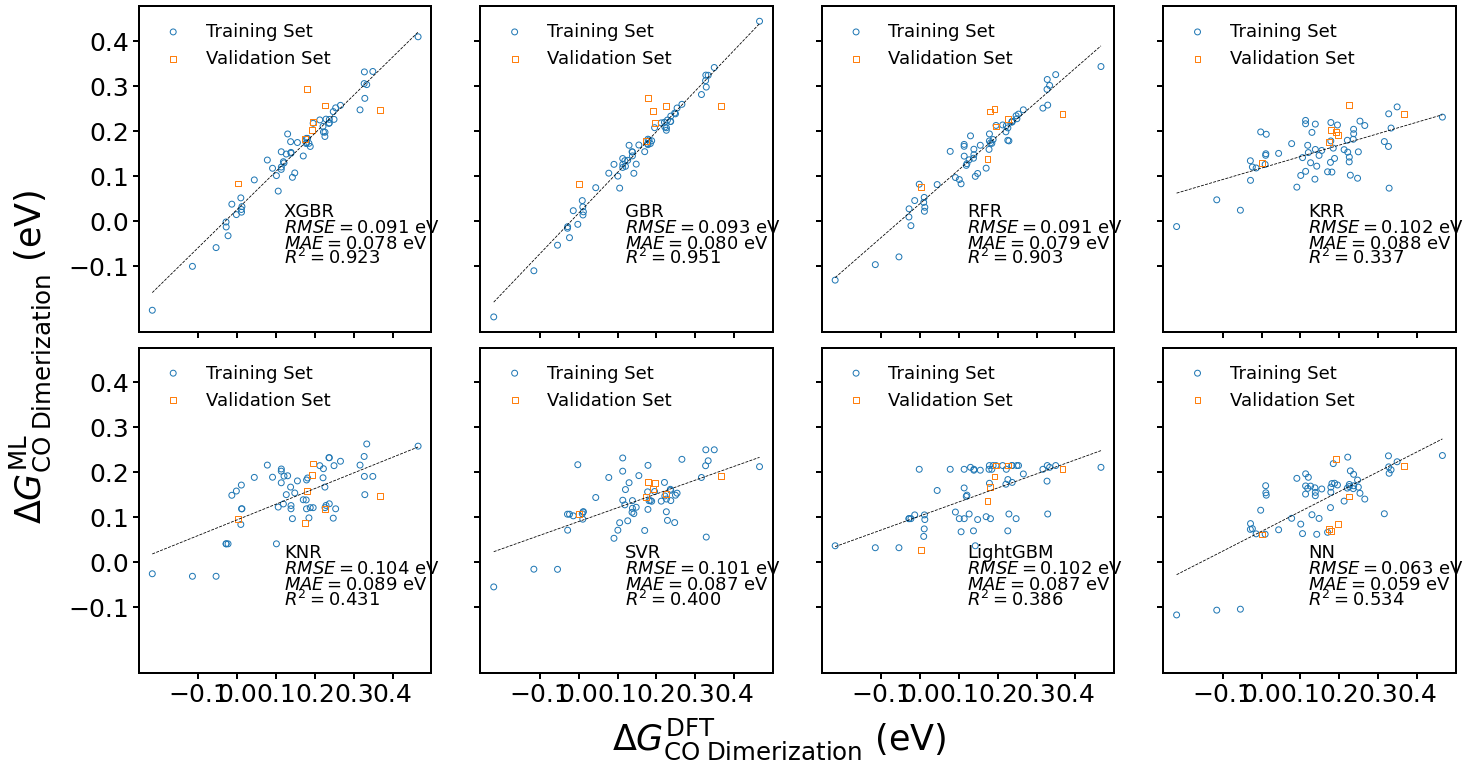

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex = True, sharey = True, figsize = (20, 10))

regressors = [xgbr, GBR, RFR, KRR, KNR, SR, light, nn]

names = {
    
    GBR: 'GBR',
    KNR: 'KNR',
    RFR: 'RFR',
    SR: 'SVR',
    light: 'LightGBM',
    xgbr: 'XGBR',
    KRR: 'KRR',
    nn: 'NN'
    
}

RMSE = {
    
    GBR: results_df['GBR'][5][1],
    KNR: results_df['KNR'][5][1],
    RFR: results_df['RFR'][5][1],
    SR: results_df['SVR'][5][1],
    light: results_df['LightGBM'][5][1],
    xgbr: results_df['XGBR'][5][1],
    KRR: results_df['KRR'][5][1],
    nn: nn_RMSE
    
}

MAE = {
    
    GBR: results_df['GBR'][5][0],
    KNR: results_df['KNR'][5][0],
    RFR: results_df['RFR'][5][0],
    SR: results_df['SVR'][5][0],
    light: results_df['LightGBM'][5][0],
    xgbr: results_df['XGBR'][5][0],
    KRR: results_df['KRR'][5][0],
    nn: nn_MAE
    
}

# Make Gco predictions on training and testing data using each regressor
for i, reg in enumerate(regressors):
    
    name = names[reg]
    rmse = RMSE[reg]
    mae = MAE[reg]
    
    
    # Predicting training data
    train_data = X_train.copy()
    train_data['G_co (eV)'] = y_train.copy()
    train_data['prediction'] = reg.predict(train_data.iloc[:, :-1])    
    
    # Predicting testing data
    test_data = X_test.copy()
    test_data['G_co (eV)'] = y_test.copy()
    test_data['prediction'] = reg.predict(test_data.iloc[:, :-1])    
    
    # Plotting the performance of each regressor
    plot_data_dimerization(train_data, test_data, i, name, rmse, mae, ax)

fig.text(0.5, -0.03, r'$\Delta G_{\mathrm{CO\;Dimerization}}^{\mathrm{DFT}}$ (eV)', ha='center', va='center', fontsize = 35)
fig.text(-0.02, 0.5, r'$\Delta G_{\mathrm{CO\;Dimerization}}^{\mathrm{ML}}$ (eV)', ha='center', va='center', rotation='vertical', fontsize = 35)
fig.tight_layout(pad = 1)

plt.savefig('{}dim_model_performances.png'.format(image_directory),dpi=600, bbox_inches = "tight")
plt.show()

#Full XGBR CV Errors

In [56]:
rmse_grid = -cross_val_score(xgbr, features, target, cv=RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 42), scoring='neg_mean_absolute_error')

[08:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [57]:
rmse_grid = rmse_grid.tolist()
rmse_grid = np.array(['%.3f' % elem for elem in rmse_grid]).astype('float')
rmse_grid = transform_2D(rmse_grid, 11)

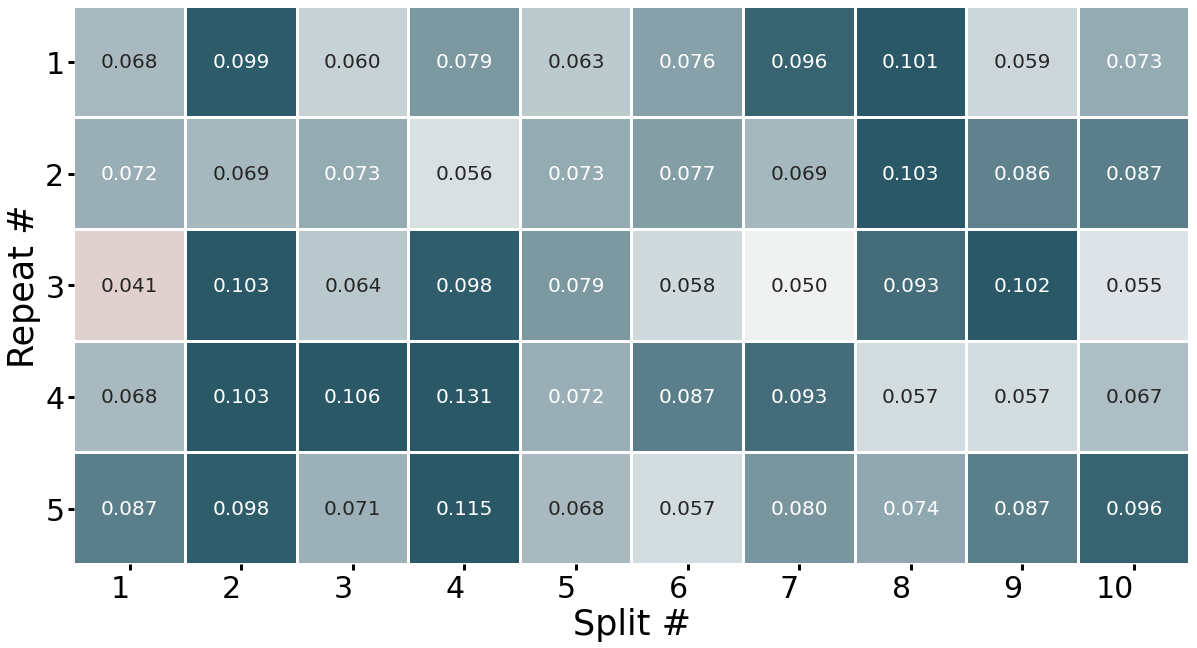

In [58]:
# Plotting all CV errors
ax = sns.heatmap(rmse_grid, linewidth=2,
                 cmap = sns.diverging_palette(20, 220, l=35, n=220), square = True, vmin = 0, vmax = 0.1,
                 cbar=False, annot=True, fmt='.3f', annot_kws={"fontsize":20})
plt.xticks(ha='right')

x_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
y_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


ax.set_xticklabels(x_labels, rotation = 0, size = 30)
ax.set_yticklabels(y_labels, rotation = 0, size = 30)

ax.tick_params(axis='x', labelcolor='black', labelsize = 30, width=3, length=6, color='black') 
ax.tick_params(axis='y', labelcolor='black', labelsize = 30, width=3, length=6, color='black') 


ax.set_xlabel('Split #', size = 35)
ax.set_ylabel('Repeat #', color='black', size = 35)

plt.savefig('{}dim_cv_splits.png'.format(image_directory),dpi=600, bbox_inches = "tight")
plt.show()

#8. XGBR Prediction on Full Dataset

In [59]:
# Import full data
prediction_df = pd.read_csv('/content/drive/Othercomputers/My Computer/Homework/Lab/Cu-Al/CO2RR-Adsorbates-main/Data/CO Dimerization Full Data.csv')

In [60]:
adsorbates = prediction_df[['Adsorbate 1', 'Adsorbate 2']]

In [61]:
# Savings the Gco column
targets = prediction_df['G_C2O2 - Gco']

In [62]:
# Removing all columns that were deleted in feature selection to maintain the same prediction features as training
prediction_df = prediction_df.drop(prediction_df.columns.difference(test_data.columns), 1)

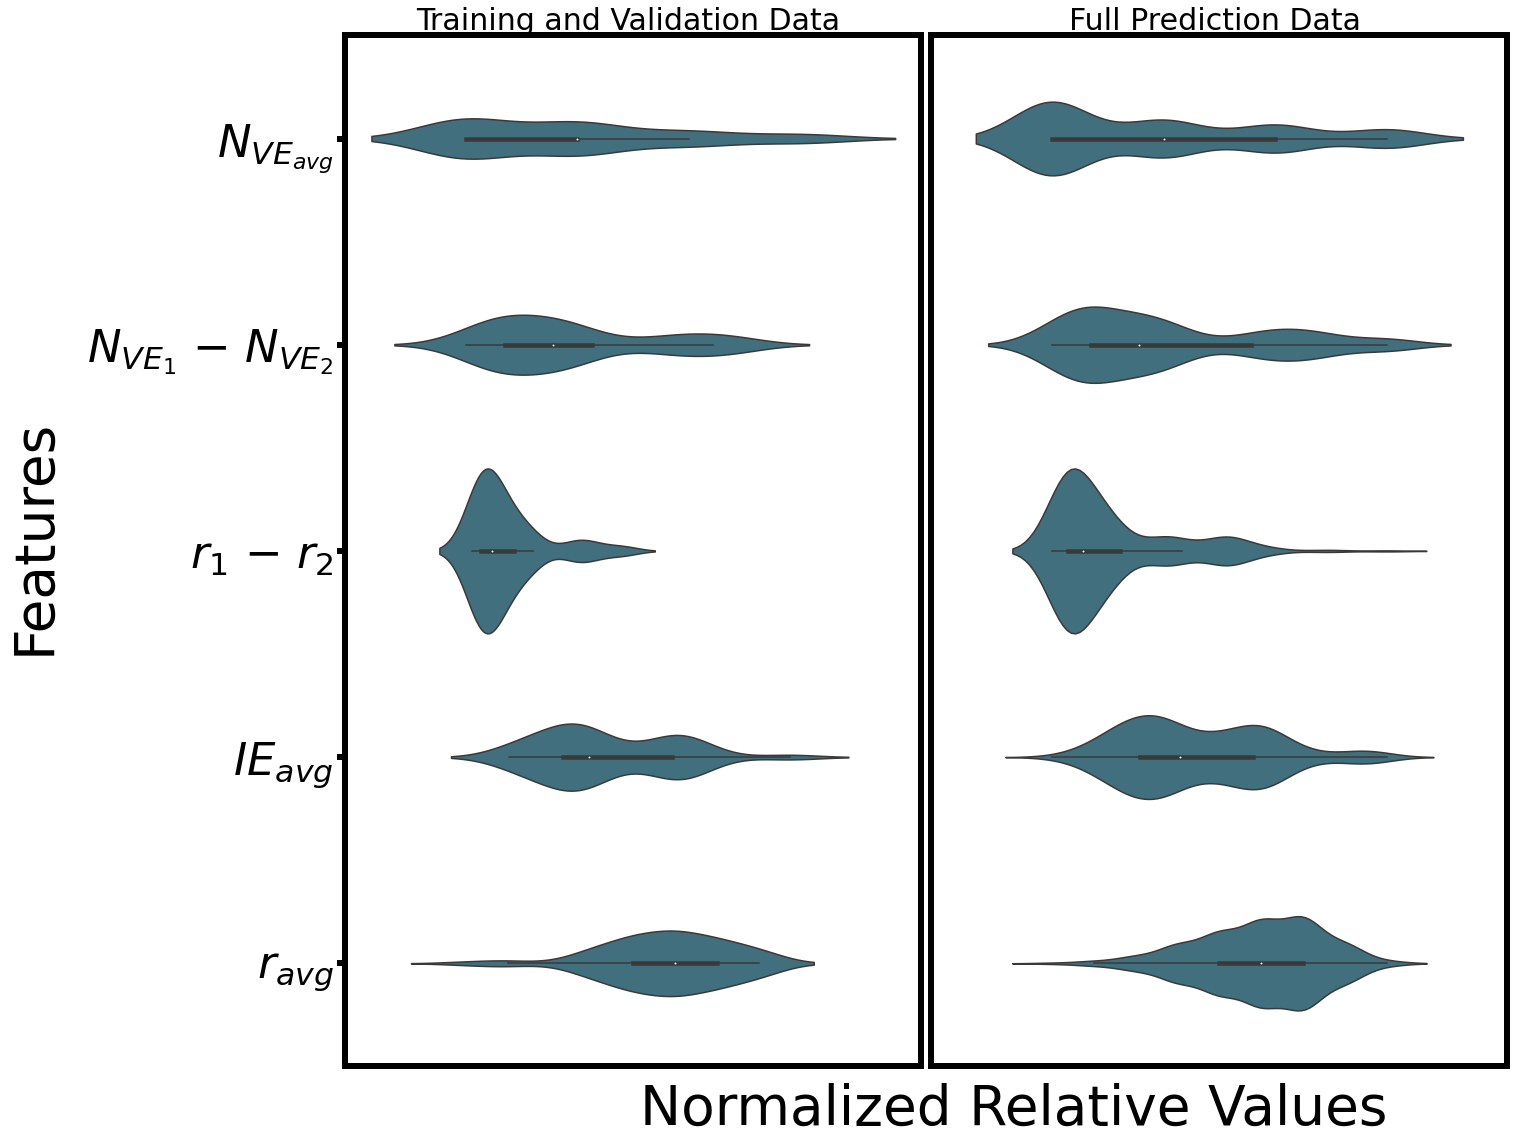

In [64]:
# Plot of the statistical distibution between training dataset and full dataset
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (20, 15))

# minmax scaling training data
training_df = scaler(df_5.copy(), '/content/drive/Othercomputers/My Computer/Homework/Lab/Cu-Al/CO2RR-Adsorbates-main/Data/CO Dimerization Full Data.csv', 'G_C2O2 - Gco')
training_df = training_df.iloc[:, :-1].melt(var_name='Features', value_name='Values')

# minmax scaling full data
full_df = scaler(prediction_df.copy(), '/content/drive/Othercomputers/My Computer/Homework/Lab/Cu-Al/CO2RR-Adsorbates-main/Data/CO Dimerization Full Data.csv', 'G_C2O2 - Gco')
full_df = full_df.melt(var_name='Features', value_name='Values')

sns.violinplot(x = 'Values', y = 'Features', data = training_df, ax=ax[0], color="#377488").set(xticklabels=[], title='Training and Validation Data (64 data pts)')
sns.violinplot(x = 'Values', y = 'Features', data = full_df, ax=ax[1], color="#377488").set(xticklabels=[], title='Full Prediction Data (289 data pts)')

ax[0].set_ylabel('')    
ax[0].set_xlabel('')
ax[1].set_ylabel('')    
ax[1].set_xlabel('')


ax[0].tick_params(axis='y', labelcolor='black', labelsize = 45, which='both', width=6, length=8)
ax[0].tick_params(axis='x', width=0, length=0)
ax[1].tick_params(width=0, length=0)
for axis in ['top','bottom','left','right']:
    ax[0].spines[axis].set_linewidth(6)
    ax[1].spines[axis].set_linewidth(6)

ax[0].set_yticklabels(corr_labels)
    
ax[0].set_title('Training and Validation Data ', fontsize=30)    
ax[1].set_title('Full Prediction Data ', fontsize=30)

plt.xticks(fontsize=40)

fig.text(0.65, -0.03, 'Normalized Relative Values', ha='center', va='center', fontsize = 55)
fig.text(-0.03, 0.5, 'Features', ha='center', va='center', rotation='vertical', fontsize = 55)
fig.tight_layout(pad = 1)

plt.savefig('{}dim_violin.png'.format(image_directory),dpi=600, bbox_inches = "tight")

In [65]:
# Adding the Gco column back
prediction_df['G_C2O2 - Gco'] = targets

In [66]:
# Full dataset prediction
import time

start = time.time()
ml_predict(prediction_df, 'G_C2O2 - Gco' ,xgbr, 'Gc-c_ML', 'Gc-c_Final')
end = time.time()
total = end-start

In [67]:
# obtain the relative RMSE of the full dataset based on training set (not strictly accurate)
b = np.sqrt(((prediction_df['G_C2O2 - Gco'] - prediction_df['Gc-c_ML'])**2).mean()).round(4)
print('Training RMSE: {}'.format(results_df['XGBR'][5][1].round(4)))
print('Testing RMSE: {}'.format(b))

Training RMSE: 0.0907
Testing RMSE: 0.0468


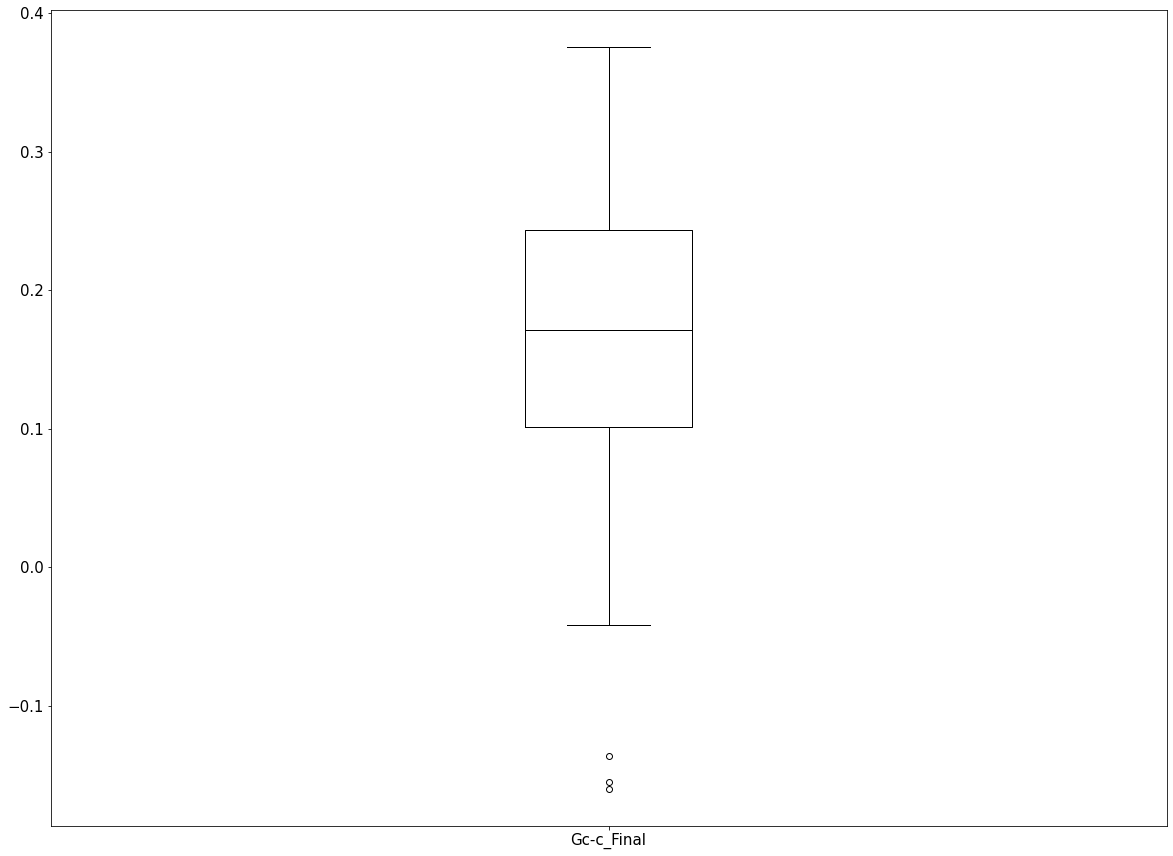

In [68]:
prediction_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='Gc-c_Final', grid=False, figsize=(20, 15));

In [69]:
# Add adsorbate names back to df
final_df = adsorbates.join(prediction_df, how = 'left')

In [70]:
# Double check no errors in df
final_df

Adsorbate 1 Adsorbate 2  ...   Gc-c_ML  Gc-c_Final
0             O           O  ...  0.025404    0.030730
1             O          OH  ...  0.182328    0.151310
2             O           N  ...  0.156400    0.156400
3             O          NH  ...  0.162229    0.162229
4             O         NH2  ...  0.210173    0.210173
..          ...         ...  ...       ...         ...
284           I         SH2  ...  0.314100    0.314100
285           I           F  ...  0.333527    0.333527
286           I          Cl  ...  0.331933    0.331933
287           I          Br  ...  0.330957    0.330957
288           I           I  ...  0.330957    0.330957

[289 rows x 10 columns]

In [71]:
# Save the predicted dataframe
final_df.to_csv('predicted_Gc-c_xgbr.csv')

#9. Full Data Heat Map

In [ ]:
# Due to the variability of ML predictions, we repeated the prediction 5 times and took the average Gc-c as result
five_times = pd.read_csv('/content/drive/Othercomputers/My Computer/Homework/Lab/Cu-Al/CO2RR-Adsorbates-main/Data/dim_five_times.csv')

In [ ]:
five_times

In [ ]:
# Define the adsorbate names and all dimerization energies
adsorbates = ['O', 'OH', 'N', 'NH', 'NH$_2$', 'NH$_{3}$', 'C', 'CH', 'CH$_2$', 'CH$_3$', 'S',
 'SH', 'SH$_2$', 'F', 'Cl', 'Br', 'I']
dim_energy = five_times['Averaged Gco']
dim_energy_min_cu = five_times['Averaged Gco']

In [ ]:
dim_energy.describe()

In [ ]:
# Transform series into a 2D array
twoD = transform_2D(dim_energy_min_cu, 18)

In [ ]:
twoD = np.array(twoD)

In [ ]:
# count the number of combinations that exhibit catalytic performance greater than pristine Cu
final = (twoD + twoD.T) / 2 - 0.184
mask = np.tril(np.ones_like(final, dtype=bool))

count = 0
for i in range(0, 17):
    for j in range(0, 17):
        if (final[i, j] < 0) and (mask[i,j]):
            count +=1
            

In [ ]:
count

In [ ]:
final_dim = final + 0.184

In [ ]:
result = []
for i in range(len(final_dim)):
    for j in range(len(final_dim[i])):
        result.append(final_dim[i, j])

In [ ]:
result = np.array(result)

In [ ]:
final_df['Gc-c_Final'] = result

In [ ]:
final_df

In [ ]:
final_df.to_csv('predicted_Gc-c_xgbr_avg.csv')

In [ ]:
# Plot final result heatmap
import matplotlib

cmap1 = matplotlib.colors.ListedColormap(['g'])
mask = np.tril(np.ones_like(final, dtype=bool))

ax = sns.heatmap(final, linewidth=2, mask = 1 - mask,
                 cmap = "coolwarm", square = True, cbar = False, vmin=-0.4, vmax=0.4)
ax.figure.axes[-1].yaxis.label.set_size(30)

#ax = sns.heatmap(twoD, linewidth=2, mask = np.array(twoD) < 0.3, cmap = cmap1, square = True, cbar=False)

ax.set_xticklabels(adsorbates, rotation = 45, size = 30)
ax.set_yticklabels(adsorbates, rotation = 0, size = 30)

ax.tick_params(axis='x', colors='black', width=0, length=0, color='black')
ax.tick_params(axis='y', colors='black', width=0, length=0, color='black') 

divider = make_axes_locatable(ax) 
cax = divider.append_axes("right", size="5%", pad=0.1) 
cbar = plt.colorbar(ax.collections[0], cax=cax)
cbar.set_ticks([-0.4, -0.2, 0.0, 0.2, 0.4])
cbar.ax.set_yticklabels(['-0.4', '-0.2',  '0.0', '0.2', '0.4'], size=35)
cbar.ax.set_ylabel('$\Delta G_{\mathrm{CO \; Dimerization}}$ $-$ $\Delta G_{\mathrm{CO \; Dimerization}}^{\mathrm{Cu(100)}}$ (eV)', fontsize = 45)
cbar.ax.tick_params(axis='y', which='major', length=8, width = 2, pad=20)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)

plt.savefig('{}dim_heatmap.png'.format(image_directory),dpi=600, bbox_inches = "tight")
plt.show()

In [ ]:
#Calculate the average CO dimerization of each adsorbate

dim_avg = calc_average(dim_energy, 18)

col = zip(adsorbates, dim_avg)

# sort and save features based on its importance into a dataframe
difference = pd.DataFrame(col, columns=['adsorbates', 'difference'])
difference_data_asc = difference.sort_values('difference', ascending=False)

# plot the importance data
fig, ax = plt.subplots()
plt.barh(y=difference_data_asc['adsorbates'], width=difference_data_asc['difference'], height=0.9, color='#377488')
ax.set_yticklabels(difference_data_asc['adsorbates'])

ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3])

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(6)

ax.tick_params(axis='x', colors='black', width=6, length=15, color='black')
ax.tick_params(axis='y', colors='black', width=6, length=15, color='black')    

ax.set_xlabel("$\Delta G_{\mathrm{CO \; Dimerization}}$ (eV)", fontsize = 55)
ax.set_ylabel('Adsorbates', fontsize = 55)

ax.tick_params(axis='x', colors='black', labelsize = 45, width=6, length=15, color='black')
ax.tick_params(axis='y', colors='black', labelsize = 45, width=6, length=15, color='black')

plt.axvline(x=0.1840105, color='tab:red', linewidth = 4, linestyle = '--')
plt.text(0.192, 15.9, 'Prinstine Cu(100): \n0.184 eV', ha='left', va='center', fontsize = 45, color='tab:red')

plt.savefig('{}dim_avg_ads.png'.format(image_directory),dpi=600, bbox_inches = "tight")
plt.show();

In [ ]:
# numerical representation of adsorbate averages
difference_data_asc